<a href="https://colab.research.google.com/github/rajniiii/Data_Analysis_AllianzInsurance/blob/main/Data_drivenAnalysis_AllianzInsuranceipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Funnel Data Frame

In [ ]:
import pandas as pd

# Load your Excel file (adjust sheet name if needed)
file_path = '/content/drive/My Drive/W31816-XLS-ENG (1)-2.xlsx'
xls = pd.ExcelFile(file_path)
print(xls.sheet_names)  # See available sheets

# Example: load the main sheet
df = pd.read_excel(file_path, sheet_name='AllianzDirectDebitData')  # replace with your actual sheet name

# Basic info
print(df.info())
print(df.describe(include='all'))

# Check for missing values
print(df.isnull().sum())


['AllianzDirectDebitData', 'Copyright']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452222 entries, 0 to 452221
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Broker_account_number  452221 non-null  object 
 1   Contract_number        452220 non-null  object 
 2   Customer_segment       452220 non-null  object 
 3   Line_of_business       452220 non-null  object 
 4   Product_type           452220 non-null  object 
 5   Annual_premium         452220 non-null  object 
 6   Payment_frequency      452220 non-null  object 
 7   Customer_ID            452220 non-null  object 
 8   Customer_age           452220 non-null  object 
 9   Customer_type          452220 non-null  object 
 10  Customer_region        452220 non-null  object 
 11  Customer_province      452220 non-null  object 
 12  Broker_region          452220 non-null  object 
 13  Broker_province        452220 non-null  object 
 

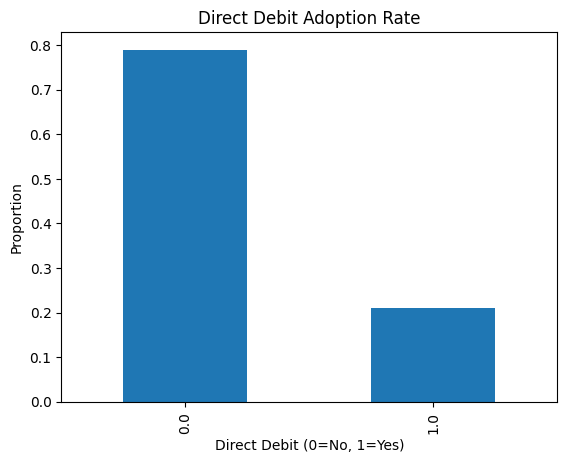

In [ ]:
import matplotlib.pyplot as plt

#  'Is_direct_debit' is the column (adjust as needed)
df['Is_direct_debit'].value_counts(normalize=True).plot(kind='bar')
plt.title('Direct Debit Adoption Rate')
plt.xlabel('Direct Debit (0=No, 1=Yes)')
plt.ylabel('Proportion')
plt.show()


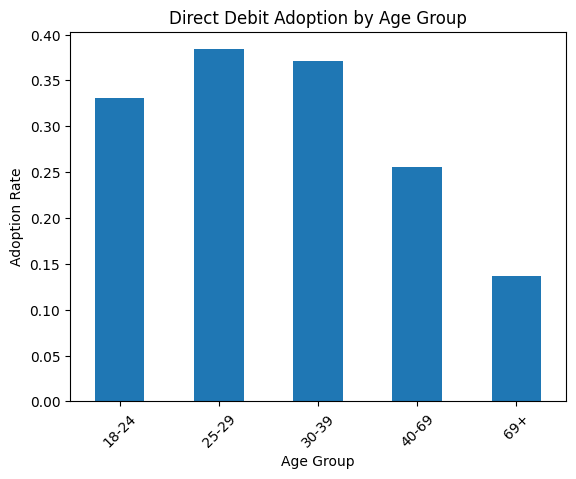

In [ ]:
df = pd.read_excel(file_path, sheet_name='AllianzDirectDebitData')

# Display the first few rows to inspect the data
df.head()

# Assuming 'Customer_age' contains the age ranges in the format '18-24', '25-29', etc.
# If not, map the categorical age ranges directly.
age_groups = ['18-24', '25-29', '30-39', '40-69', '69+']

# Group by 'Customer_age' and calculate the adoption rate for each age group
adoption_rate = df.groupby('Customer_age')['Is_direct_debit'].mean()

# Plot adoption by age group
adoption_rate[age_groups].plot(kind='bar')
plt.title('Direct Debit Adoption by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Adoption Rate')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Convert AnnualPremium to numeric
df['Annual_premium'] = pd.to_numeric(df['Annual_premium'], errors='coerce')

# Now group by Line of Business
lob_stats = df.groupby('Line_of_business')['Annual_premium'].agg(['mean', 'median', 'count', 'min', 'max'])
print(lob_stats)


                         mean    median   count    min         max
Line_of_business                                                  
A - Motor          625.741643   424.985  171698  10.31   349600.00
D - Property      8065.079321  3361.970    2239  10.80  3006056.32
E - Liability     1085.331460   302.500   19696  14.43   920000.00
I - Property       526.549086   393.570  111250  10.30   114037.91
N - Accident        85.777823    61.110   46645  10.02     7150.52
P - Liability       81.983209    74.850   82091  11.71    10286.58
R - Engineering   1667.793758   250.000    5125  22.50   400000.00


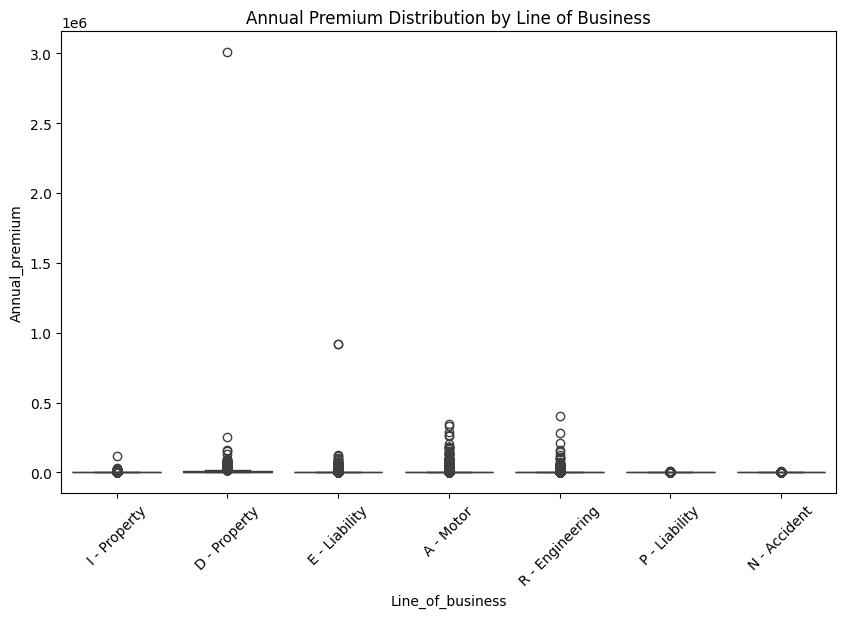

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='Line_of_business', y='Annual_premium', data=df)
plt.title('Annual Premium Distribution by Line of Business')
plt.xticks(rotation=45)  # Rotate labels if needed
plt.show()



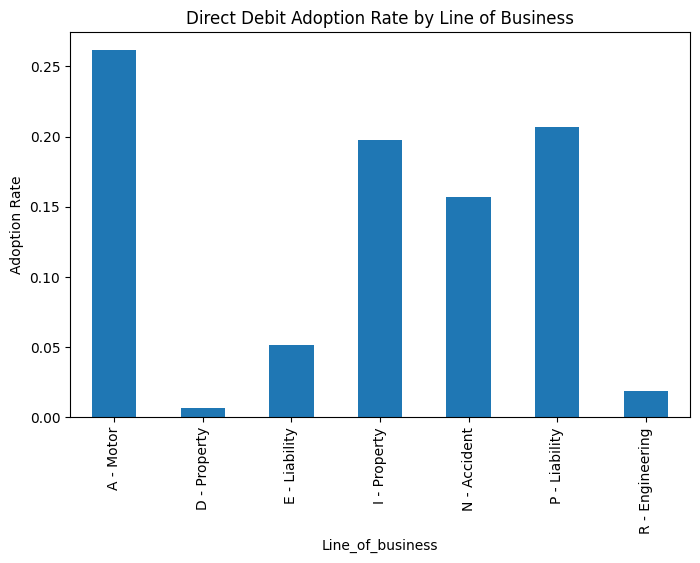

In [ ]:
# Direct debit adoption rate by line of business
adoption_by_lob = df.groupby('Line_of_business')['Is_direct_debit'].mean()

adoption_by_lob.plot(kind='bar', figsize=(8, 5))
plt.title('Direct Debit Adoption Rate by Line of Business')
plt.ylabel('Adoption Rate')
plt.show()


In [ ]:
import pandas as pd

# Load Excel file
file_path = '/content/drive/My Drive/W31816-XLS-ENG (1)-2.xlsx'
df = pd.read_excel(file_path, sheet_name='AllianzDirectDebitData')

print(df.info())
print(df.describe(include='all'))
print("Missing values:\n", df.isnull().sum())

# Optional: Subset data for testing
df = df.sample(n=20000, random_state=42)
print(f"✅ Subset data loaded: {df.shape}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452222 entries, 0 to 452221
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Broker_account_number  452221 non-null  object 
 1   Contract_number        452220 non-null  object 
 2   Customer_segment       452220 non-null  object 
 3   Line_of_business       452220 non-null  object 
 4   Product_type           452220 non-null  object 
 5   Annual_premium         452220 non-null  object 
 6   Payment_frequency      452220 non-null  object 
 7   Customer_ID            452220 non-null  object 
 8   Customer_age           452220 non-null  object 
 9   Customer_type          452220 non-null  object 
 10  Customer_region        452220 non-null  object 
 11  Customer_province      452220 non-null  object 
 12  Broker_region          452220 non-null  object 
 13  Broker_province        452220 non-null  object 
 14  Is_direct_debit        452220 non-nu

In [ ]:
target = 'Is_direct_debit'
exclude_cols = [
    'Broker_account_number',
    'Contract_number',
    'Customer_ID',
    'Broker_cor',
    target
]
features = [col for col in df.columns if col not in exclude_cols]

X = df[features].copy()
y = df[target]

# Clean Customer_age if needed
if 'Customer_age' in X.columns:
    X.loc[:, 'Customer_age'] = pd.to_numeric(X['Customer_age'], errors='coerce')

print(f" X shape: {X.shape}, y shape: {y.shape}")


 X shape: (20000, 13), y shape: (20000,)


In [ ]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_encoded = encoder.fit_transform(X[categorical_cols])

X_numeric = X.drop(columns=categorical_cols).astype(float)
X_final = np.hstack((X_numeric.values, X_encoded))

print(f" Encoding complete: {X_final.shape}")


 Encoding complete: (20000, 14695)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, test_size=0.3, random_state=42, stratify=y
)

print(f" Train shape: {X_train.shape}, Test shape: {X_test.shape}")


 Train shape: (14000, 14695), Test shape: (6000, 14695)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
y_prob_logreg = logreg.predict_proba(X_test)[:, 1]

print("\n Logistic Regression Results")
print(f"Accuracy: {accuracy_score(y_test, y_pred_logreg):.4f}")
print(f"AUC: {roc_auc_score(y_test, y_prob_logreg):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))



 Logistic Regression Results
Accuracy: 0.9845
AUC: 0.9738
Confusion Matrix:
 [[4730    0]
 [  93 1177]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      4730
         1.0       1.00      0.93      0.96      1270

    accuracy                           0.98      6000
   macro avg       0.99      0.96      0.98      6000
weighted avg       0.98      0.98      0.98      6000




 XGBoost Classifier Results
Accuracy: 0.9845
AUC: 0.9722
Confusion Matrix:
 [[4730    0]
 [  93 1177]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      4730
         1.0       1.00      0.93      0.96      1270

    accuracy                           0.98      6000
   macro avg       0.99      0.96      0.98      6000
weighted avg       0.98      0.98      0.98      6000



<Figure size 1000x600 with 0 Axes>

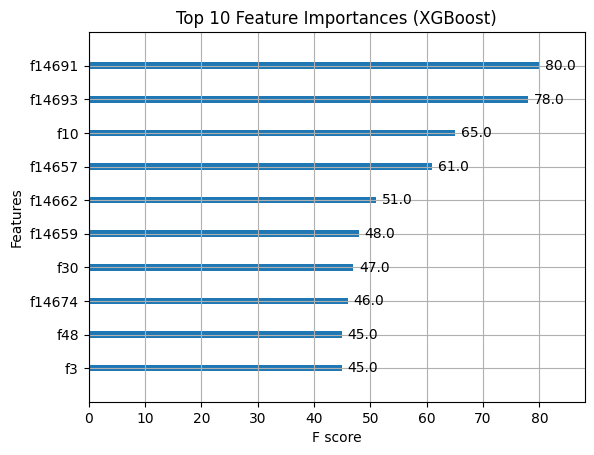

In [ ]:
import xgboost as xgb
import matplotlib.pyplot as plt

xgb_clf = xgb.XGBClassifier(eval_metric='logloss')
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)
y_prob_xgb = xgb_clf.predict_proba(X_test)[:, 1]

print("\n XGBoost Classifier Results")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print(f"AUC: {roc_auc_score(y_test, y_prob_xgb):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

plt.figure(figsize=(10, 6))
xgb.plot_importance(xgb_clf, max_num_features=10)
plt.title('Top 10 Feature Importances (XGBoost)')
plt.show()


In [ ]:
# Get all feature names after one-hot encoding
encoded_feature_names = encoder.get_feature_names_out(categorical_cols)

# Combine numeric + encoded feature names
final_feature_names = list(X_numeric.columns) + list(encoded_feature_names)

# Now let's look at the top 10 feature indices from the XGBoost plot
top_features = ['f7805', 'f7803', 'f29', 'f10', 'f3', 'f7774', 'f7771', 'f7786', 'f6', 'f7769']

# Map each feature index to the actual feature name
for feat in top_features:
    idx = int(feat[1:])  # remove the 'f' and convert to integer
    print(f"{feat} → {final_feature_names[idx]}")


f7805 → Annual_premium_417.98
f7803 → Annual_premium_417.91
f29 → Product_type_E32 - Cyber Pl
f10 → Product_type_A01 - TA/PRIVE
f3 → Line_of_business_A - Motor
f7774 → Annual_premium_417.01
f7771 → Annual_premium_416.67
f7786 → Annual_premium_417.34
f6 → Line_of_business_I - Property
f7769 → Annual_premium_416.58


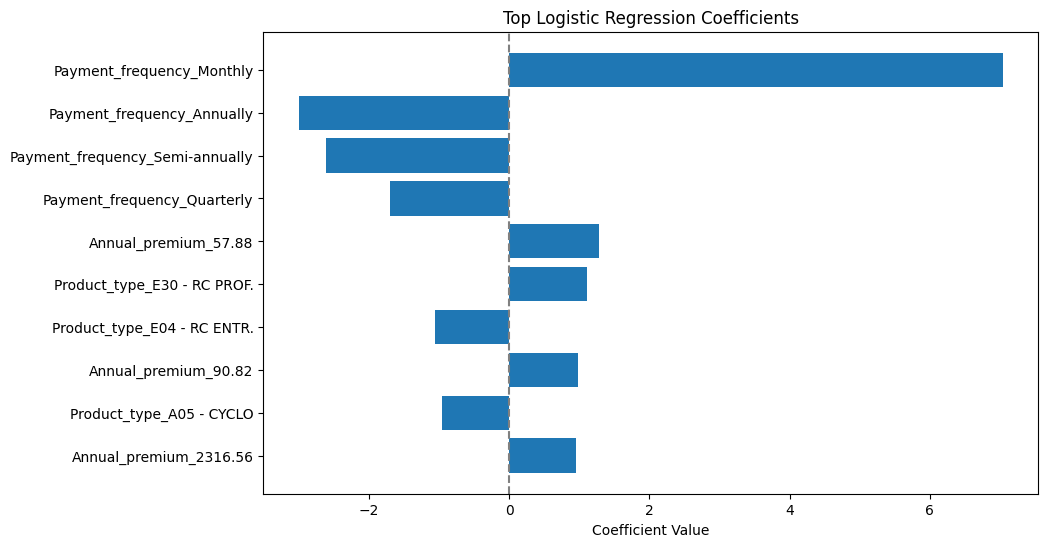

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#  Get the full feature names (numeric + encoded categorical)
encoded_feature_names = encoder.get_feature_names_out(categorical_cols)
final_feature_names = list(X_numeric.columns) + list(encoded_feature_names)

#  Extract coefficients from the logistic regression model
coefficients = logreg.coef_[0]

#  Create a DataFrame for easy plotting
coef_df = pd.DataFrame({
    'Feature': final_feature_names,
    'Coefficient': coefficients
})

#  Get top 10 (absolute value) for best visual impact
top_coef_df = coef_df.reindex(coef_df.Coefficient.abs().sort_values(ascending=False).index).head(10)

#  Plot: Top coefficients (horizontal bar chart)
plt.figure(figsize=(10, 6))
bars = plt.barh(top_coef_df['Feature'], top_coef_df['Coefficient'])
plt.title('Top Logistic Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.axvline(0, color='grey', linestyle='--')
plt.gca().invert_yaxis()  # Show highest at the top
plt.show()


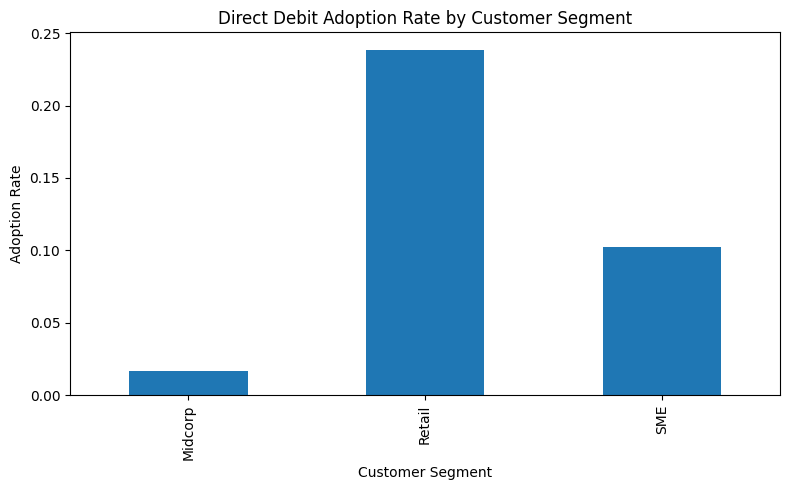

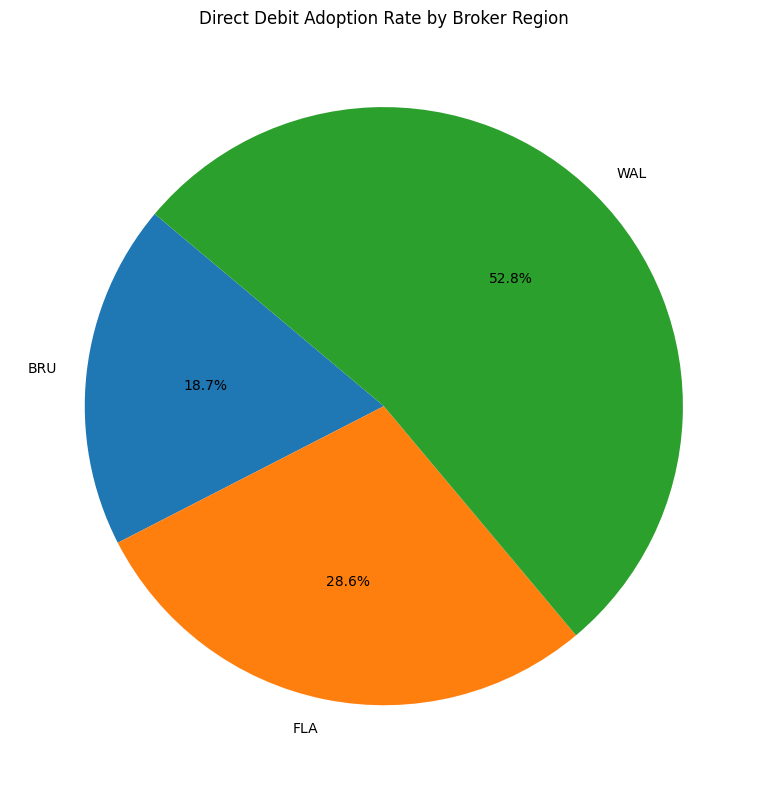

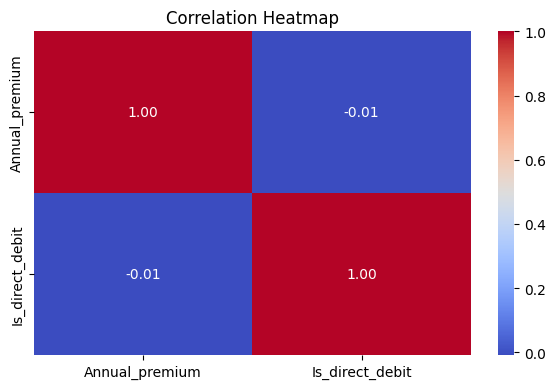

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = '/content/drive/My Drive/W31816-XLS-ENG (1)-2.xlsx'  # Update path if needed
df = pd.read_excel(file_path, sheet_name='AllianzDirectDebitData')

# Ensure Annual_premium is numeric
df['Annual_premium'] = pd.to_numeric(df['Annual_premium'], errors='coerce')

# 1️⃣ Bar plot: Direct debit adoption rate by Customer_segment
adoption_by_segment = df.groupby('Customer_segment')['Is_direct_debit'].mean()

plt.figure(figsize=(8, 5))
adoption_by_segment.plot(kind='bar')
plt.title('Direct Debit Adoption Rate by Customer Segment')
plt.ylabel('Adoption Rate')
plt.xlabel('Customer Segment')
plt.tight_layout()
plt.show()

# 2️⃣ Pie chart: Direct debit adoption rate by Broker_region
adoption_by_broker = df.groupby('Broker_region')['Is_direct_debit'].mean()

plt.figure(figsize=(8, 8))
adoption_by_broker.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Direct Debit Adoption Rate by Broker Region')
plt.ylabel('')
plt.tight_layout()
plt.show()

# 3️⃣ Correlation heatmap for numerical columns
num_cols = ['Annual_premium', 'Is_direct_debit']
corr_matrix = df[num_cols].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


NaN Counts:
 affinity_name           0
status_report           2
offer_number            0
policy_number        6801
zipcode_link            0
zip4                    0
birth_date            143
brand                   3
date_offer              0
date_request         6801
policy_start_date    6697
premium               379
buildyear_car           3
buildmonth_car          3
wa                   5792
wa_bep_ca            6312
wa_ca                5282
updated_on              0
dtype: int64

NaT Count in 'policy_start_date': 6697


<ipython-input-126-a113b10db47e>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['policy_start_date_num'] = (df['policy_start_date'] - pd.Timestamp('2000-01-01')).dt.days


Total Premium: 1544339.17

Premium Frequency:
premium
0.00       2
39.48      1
40.90      1
41.24      1
42.36      2
          ..
2034.00    1
2332.68    1
2339.28    1
2351.04    1
3320.76    1
Name: count, Length: 1784, dtype: int64

Predicted Premiums (example):
[ 474.40335931  538.17588811  581.32551743  589.36068378  389.95744573
  668.50307463  671.14801545  670.1839716   690.92324183  584.8356258
  588.91574046  670.70307213  666.24127945  670.51767908  784.84138174
  512.045951    496.48097761  528.04391573  589.0640549   536.13656458
  755.90314796  788.43800687  671.13565591  591.94382691  349.95072104
  474.83594309  591.28877147  487.99679983  591.63483849  588.54495437
  535.33319471  668.50307463  784.84138174  670.76486981  754.64247523
  591.94382691  785.78070652  536.14892412  535.41971147  390.77317514
  498.73041326  564.46019321  835.66730738  474.78650494  667.30419959
  523.02905146  693.35807052  592.77191585  668.54015324  707.8329482
  834.5920277   712.0351

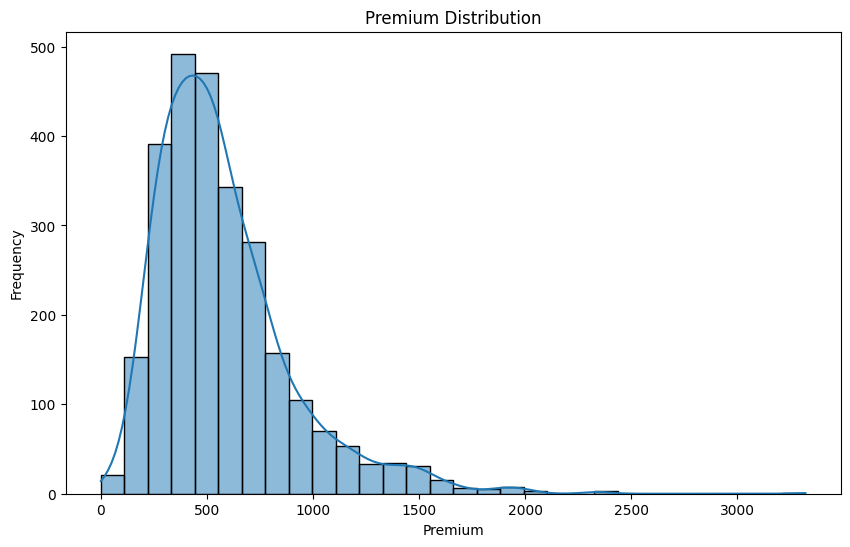

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the data
df = pd.read_excel('/content/W27307-XLS-ENG.xlsx', sheet_name='funnel_data')

# 2. Count and Remove NaN and NaT Values
# ---

# Count NaN values in each column
nan_counts = df.isna().sum()
print("NaN Counts:\n", nan_counts)

# Count NaT values in the 'policy_start_date' column
nat_count = df['policy_start_date'].isnull().sum()
print("\nNaT Count in 'policy_start_date':", nat_count)

# Remove rows with NaN or NaT values in required columns
required_cols = ['status_report', 'brand', 'premium', 'policy_start_date']
df = df.dropna(subset=required_cols)

# 3. Data Cleaning and Preparation:
# ---
# Convert 'policy_start_date' to datetime if it's not already
if not pd.api.types.is_datetime64_any_dtype(df['policy_start_date']):
    df['policy_start_date'] = pd.to_datetime(df['policy_start_date'])

# ---

# 4. Calculate Total Premium and Frequency
total_premium = df['premium'].sum()
premium_frequency = df['premium'].value_counts().sort_index()

# 5. Prepare data for prediction
# Convert 'policy_start_date' to numerical representation
df['policy_start_date_num'] = (df['policy_start_date'] - pd.Timestamp('2000-01-01')).dt.days
# One-hot encode 'brand' and update the DataFrame
df = pd.get_dummies(df, columns=['brand'], drop_first=True, prefix='brand')

# 6. Split data into training and testing sets
# Dynamically select brand columns after one-hot encoding
brand_columns = [col for col in df.columns if col.startswith('brand_')]
X = df[['policy_start_date_num'] + brand_columns]
y = df['premium']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Train the model and predict
model = LinearRegression()
model.fit(X_train, y_train)
predicted_premiums = model.predict(X_test)

# 8. Display results
print(f"Total Premium: {total_premium}")
print("\nPremium Frequency:")
print(premium_frequency)
print("\nPredicted Premiums (example):")
print(predicted_premiums)

# (Optional) Visualize premium frequency
plt.figure(figsize=(10, 6))
sns.histplot(df['premium'], bins=30, kde=True)
plt.title('Premium Distribution')
plt.xlabel('Premium')
plt.ylabel('Frequency')
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the data
df = pd.read_excel('/content/W27307-XLS-ENG.xlsx', sheet_name='funnel_data')

# 2. Calculate Total Premium and Frequency
total_premium = df['premium'].sum()
premium_frequency = df['premium'].value_counts().sort_index()

# 3. Prepare data for prediction
# Convert 'policy_start_date' to numerical representation
df['policy_start_date_num'] = (df['policy_start_date'] - pd.Timestamp('2000-01-01')).dt.days
# One-hot encode 'brand'

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 1. Load the data
df = pd.read_excel('/content/W27307-XLS-ENG.xlsx', sheet_name='funnel_data')  # Assuming 'funnel_data' sheet contains premium info

# 2. Calculate Total Premium and Frequency
total_premium = df['premium'].sum()
premium_frequency = df['premium'].value_counts().sort_index()  # Frequency of each premium value

# 3. Prepare data for prediction (example using Linear Regression)
# Assuming 'policy_start_date' and 'brand' are potential predictors
# Convert 'policy_start_date' to numerical representation (e.g., days since a reference date)
df['policy_start_date_num'] = (df['policy_start_date'] - pd.Timestamp('2000-01-01')).dt.days
# One-hot encode 'brand'
# This line was missing: Assigning the result of get_dummies back to df
df = pd.get_dummies(df, columns=['brand'], drop_first=True)

# Check if the expected columns exist
print(df.columns)

# 4. Split data into training and testing sets
# Select columns for X after one-hot encoding, or use all numeric features if unsure
X = df[['policy_start_date_num', 'brand_Allianz', 'brand_AXA']]  # Adjust column names as needed
y = df['premium']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Train the model and predict
model = LinearRegression()
model.fit(X_train, y_train)
predicted_premiums = model.predict(X_test)

# 6. Display results
print(f"Total Premium: {total_premium}")
print("\nPremium Frequency:")
print(premium_frequency)
print("\nPredicted Premiums (example):")
print(predicted_premiums)

# ... (rest of the code)

In [ ]:
import pandas as pd

# Read the dataset, specifying the sheet name
df = pd.read_excel('/content/W27307-XLS-ENG.xlsx', sheet_name='funnel_data')

# Display the DataFrame
display(df)

affinity_name           status_report  offer_number  policy_number  \
0           Insuro        Requestwithdrawn          1000        10000.0   
1            other  Tailoredofferwithdrawn          1001            NaN   
2            other       Incompleterequest          1002            NaN   
3            other           Policycreated          1003        10002.0   
4            other           Policycreated          1004        10003.0   
...            ...                     ...           ...            ...   
9368         other         Requestaccepted          9439        11946.0   
9369         other         Waitforapproval          9440        11947.0   
9370        Insuro  Tailoredofferrequested          9441            NaN   
9371           T&B     Calculatenewpremium          9442            NaN   
9372           T&B       Incompleterequest          9443            NaN   

      zipcode_link  zip4 birth_date       brand date_offer date_request  \
0            10000  2132 1985-01-01     HYUNDAI 2018-10-11   2018-10-11   
1            10001  6027 1987-04-01        AUDI 2018-10-11          NaT   
2            10002  3824 1972-11-01  VOLKSWAGEN 2018-10-11          NaT   
3            10003  6921 1983-08-01       MAZDA 2018-10-11   2018-10-11   
4            10004  8266 1990-04-01       VOLVO 2018-10-12   2018-10-12   
...            ...   ...        ...         ...        ...          ...   
9368         15568  1161 1960-09-01  VOLKSWAGEN 2020-03-08   2020-03-08   
9369         15582  5015 1953-04-01      NISSAN 2020-03-08   2020-03-08   
9370         10332  3078 1976-04-01      TOYOTA 2020-03-08          NaT   
9371         12968  1965 1951-07-01      TOYOTA 2020-03-08          NaT   
9372         15526  1165 1964-01-01       VOLVO 2020-03-08          NaT   

     policy_start_date  premium  buildyear_car buildmonth_car   wa wa_bep_ca  \
0           2018-11-01   686.04         2016.0           June    Y       NaN   
1                  NaT     0.00         2015.0           June    N         N   
2                  NaT   896.04         2016.0          April  NaN       NaN   
3           2018-10-12   419.16         2009.0           June  NaN         Y   
4           2018-11-01   402.36         2003.0        January    Y       NaN   
...                ...      ...            ...            ...  ...       ...   
9368        2020-03-09   510.68         2011.0       December  NaN       NaN   
9369        2020-04-29   459.60         2017.0       February  NaN       NaN   
9370               NaT   521.16         2004.0        January  NaN         Y   
9371               NaT   368.40         2004.0      September  NaN         Y   
9372               NaT   764.52         2015.0           June  NaN       NaN   

     wa_ca updated_on  
0      NaN 2018-10-11  
1        N 2018-10-12  
2        Y 2018-10-11  
3      NaN 2018-10-11  
4      NaN 2018-10-12  
...    ...        ...  
9368     Y 2020-03-08  
9369     Y 2020-03-08  
9370   NaN 2020-03-08  
9371   NaN 2020-03-08  
9372     Y 2020-03-08  

[9373 rows x 18 columns]

In [ ]:

affinity_name	status_report	offer_number	policy_number	zipcode_link	zip4	birth_date	brand	date_offer	date_request	policy_start_date	premium	buildyear_car	buildmonth_car	wa	wa_bep_ca	wa_ca	updated_o

In [ ]:
import pandas as pd

# Read the dataset, specifying the sheet name
df = pd.read_excel('/content/W27307-XLS-ENG.xlsx', sheet_name='funnel_data')

# Calculate the total premium
total_premium = df['premium'].sum()

# Print the result
print(f"Total Premium: {total_premium}")

Total Premium: 5029673.29


In [ ]:
# ... (Previous code)

# Ensure that you are using the correct DataFrame with the 'premium' column
# It might be necessary to reload the original DataFrame with the 'premium' column
# df = pd.read_excel('your_file.xlsx', sheet_name='your_sheet_name') # If you have a specific sheet

# Check if 'premium' is in the columns of your DataFrame
if 'premium' not in df.columns:
    print("Error: 'premium' column is missing in the DataFrame. Please check your data loading.")
else:
    # Continue with your calculations if the 'premium' column exists
    original_revenue = df['premium'].sum()
    # ... (rest of your code)

In [ ]:
import pandas as pd

# ... (Load data, handle missing values as before) ...

# --- Discount Analysis ---
discount_amount = 50  # $50 discount
new_customers = 100  # 100 new customers

# Calculate the total cost of the discount
total_discount_cost = discount_amount * new_customers

# Calculate average premium of existing customers
avg_premium_existing = df['premium'].mean()

# Assume new customers pay the average premium minus the discount
avg_premium_new = avg_premium_existing - discount_amount

# Calculate total potential revenue from new customers
total_revenue_new = avg_premium_new * new_customers

# Calculate profit or loss
profit = total_revenue_new - total_discount_cost

# --- Output Results ---
print(f"Total Discount Cost: ${total_discount_cost}")
print(f"Total Potential Revenue from New Customers: ${total_revenue_new:.2f}")
print(f"Profit/Loss: ${profit:.2f}")

# --- Decision ---
if profit > 0:
    print("\nThe offer is potentially profitable.")
else:
    print("\nThe offer is potentially not profitable.")

Total Discount Cost: $5000
Total Potential Revenue from New Customers: $50922.54
Profit/Loss: $45922.54

The offer is potentially profitable.


In [ ]:
numerical_features = ['premium', 'buildyear_car', 'wa', 'wa_bep_ca', 'wa_ca']
for feature in numerical_features:
    df[feature] = pd.to_numeric(df[feature], errors='coerce')
df = df.dropna(subset=numerical_features)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy_financial as npf

# 1. Load and preprocess data (same as before)
df = pd.read_excel('/content/W27307-XLS-ENG.xlsx', sheet_name='funnel_data')
# ... (handle missing values and convert 'policy_start_date' to datetime)

# 2. Select numerical features and convert to numeric
numerical_features = ['premium', 'buildyear_car', 'wa', 'wa_bep_ca', 'wa_ca']
# Convert columns to numeric, but handle errors by replacing with 0 instead of NaN
for feature in numerical_features:
    df[feature] = pd.to_numeric(df[feature], errors='coerce').fillna(0)
# Now, dropna will only remove rows where ALL numerical_features are 0, which is unlikely
df = df.dropna(subset=numerical_features)
# Check if the DataFrame is still empty
if df.empty:
    print("Error: DataFrame is empty after dropping rows. Please check your data.")
else:
    # 3. Standardize data
    X = df[numerical_features]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # 4. Perform PCA
    pca = PCA(n_components=2)  # Choose the number of components
    principal_components = pca.fit_transform(X_scaled)

    # 5. Create a DataFrame with principal components
    principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

    # --- Acquisition Cost Calculation ---
    # Assuming a cost per acquisition (CPA)
    cpa = 50  # Example CPA, adjust based on your data
    new_customers = 1000  # Number of new Volkswagen customers
    discount_amount = 100  # Discount offer on premium

    # Total acquisition cost
    total_acquisition_cost = new_customers * cpa

    # Print the results
    print("Principal Components:")
    print(principal_df.head())
    print(f"\nTotal Acquisition Cost for 1000 new Volkswagen customers: ${total_acquisition_cost}")

Principal Components:
        PC1       PC2
0  0.427730  0.115606
1 -0.838947 -1.112249
2  0.809524  0.497400
3 -0.193354 -0.233721
4 -0.340364 -0.147797

Total Acquisition Cost for 1000 new Volkswagen customers: $50000


In [ ]:
!pip install factor_analyzer

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load and preprocess data
df = pd.read_excel('/content/W27307-XLS-ENG.xlsx', sheet_name='funnel_data')

# 2. Handle missing values and convert 'policy_start_date' to datetime
# ... (Your code to handle missing values and datetime conversion) ...

# 3. Select numerical features and convert to numeric
numerical_features = ['premium', 'buildyear_car', 'wa', 'wa_bep_ca', 'wa_ca']
for feature in numerical_features:
    df[feature] = pd.to_numeric(df[feature], errors='coerce').fillna(0)

# 4. Calculate Total Premium by Brand
brand_premium = df.groupby('brand')['premium'].sum().reset_index()

# 5. Select Top 20 Brands
top_20_brands = brand_premium.sort_values(by='premium', ascending=False).head(20)

# 6. Filter data for top 20 brands
df_top20 = df[df['brand'].isin(top_20_brands['brand'])]

# 7. Standardize data for PCA
X = df_top20[numerical_features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 8. Perform PCA
pca = PCA(n_components=2)  # Choose 2 components for visualization
principal_components = pca.fit_transform(X_scaled)

# 9. Create a DataFrame with principal components and brand information
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
principal_df['brand'] = df_top20['brand'].values  # Add brand column

# 10. Visualize PCA with Seaborn

<ipython-input-22-c30e0fd8c46a>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_volkswagen['discounted_premium'] = df_volkswagen['premium'] * (1 - discount_rate)


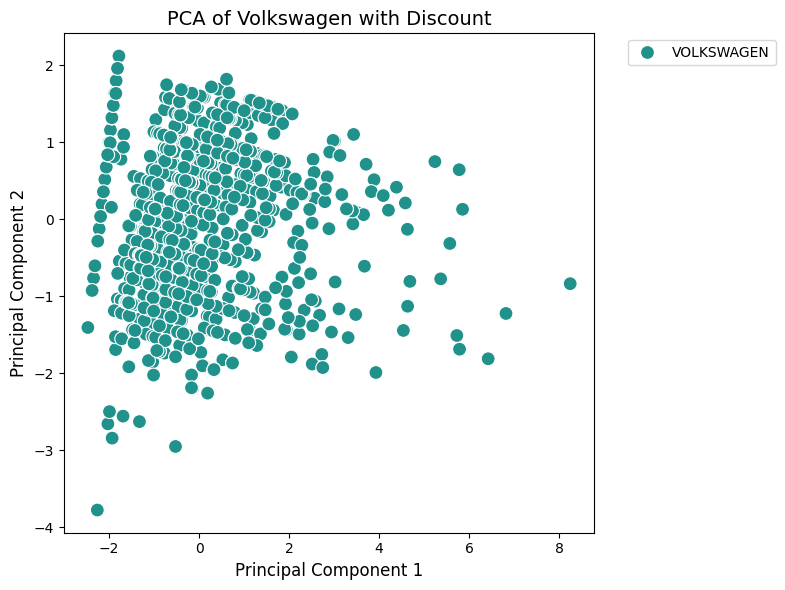

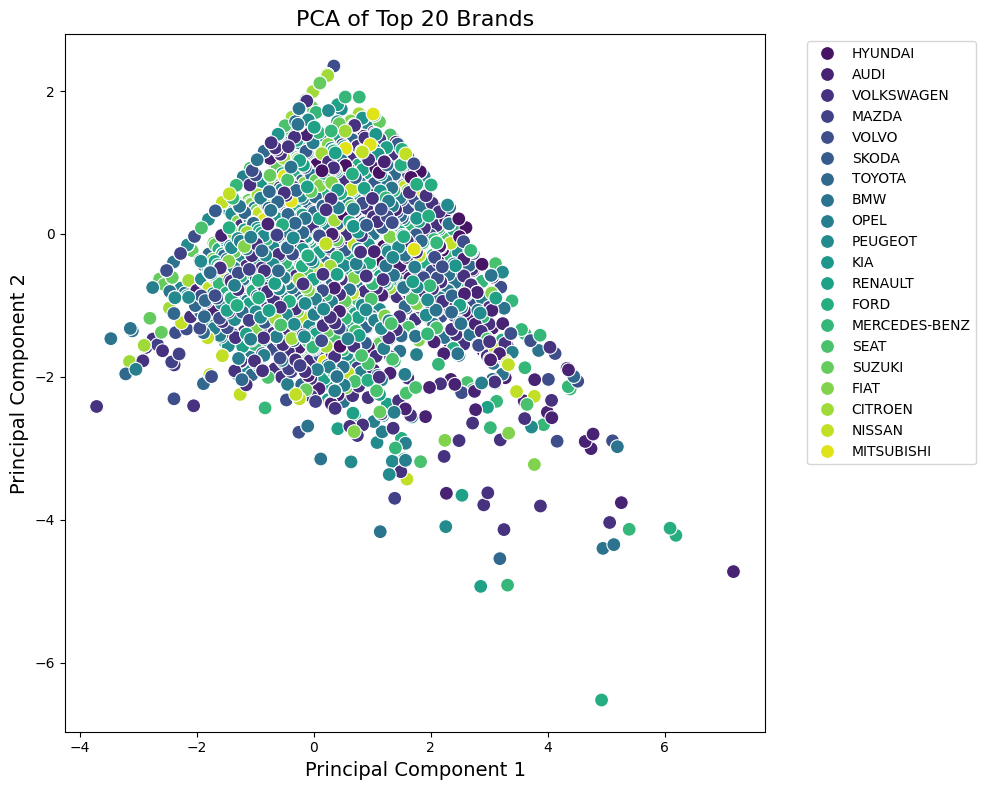

In [ ]:
!pip install factor_analyzer

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load and preprocess data
df = pd.read_excel('/content/W27307-XLS-ENG.xlsx', sheet_name='funnel_data')

# 2. Handle missing values and convert 'policy_start_date' to datetime
# ... (Your code to handle missing values and datetime conversion) ...

# 3. Select numerical features and convert to numeric
numerical_features = ['premium', 'buildyear_car', 'wa', 'wa_bep_ca', 'wa_ca']
for feature in numerical_features:
    df[feature] = pd.to_numeric(df[feature], errors='coerce').fillna(0)

# 4. Calculate Total Premium by Brand
brand_premium = df.groupby('brand')['premium'].sum().reset_index()

# 5. Select Top 20 Brands
top_20_brands = brand_premium.sort_values(by='premium', ascending=False).head(20)

# 6. Filter data for top 20 brands
df_top20 = df[df['brand'].isin(top_20_brands['brand'])]

# --- Volkswagen Discount Analysis ---
# 7. Filter data for Volkswagen
df_volkswagen = df_top20[df_top20['brand'] == 'VOLKSWAGEN']

# 8. Apply discount to Volkswagen premiums
discount_rate = 0.10  # 10% discount
df_volkswagen['discounted_premium'] = df_volkswagen['premium'] * (1 - discount_rate)

# 9. Standardize data for Volkswagen (including discounted premium)
X_volkswagen = df_volkswagen[numerical_features + ['discounted_premium']]
scaler_volkswagen = StandardScaler()
X_scaled_volkswagen = scaler_volkswagen.fit_transform(X_volkswagen)

# 10. Perform PCA for Volkswagen
pca_volkswagen = PCA(n_components=2)
principal_components_volkswagen = pca_volkswagen.fit_transform(X_scaled_volkswagen)

# 11. Create DataFrame for Volkswagen PCA plot
principal_df_volkswagen = pd.DataFrame(data=principal_components_volkswagen, columns=['PC1', 'PC2'])
principal_df_volkswagen['brand'] = df_volkswagen['brand'].values

# --- PCA for Top 20 Brands (Same as before) ---
# 12. Standardize data for top 20 brands
X_top20 = df_top20[numerical_features]
scaler_top20 = StandardScaler()
X_scaled_top20 = scaler_top20.fit_transform(X_top20)

# 13. Perform PCA for top 20 brands
pca_top20 = PCA(n_components=2)
principal_components_top20 = pca_top20.fit_transform(X_scaled_top20)

# 14. Create DataFrame for top 20 brands PCA plot
principal_df_top20 = pd.DataFrame(data=principal_components_top20, columns=['PC1', 'PC2'])
principal_df_top20['brand'] = df_top20['brand'].values


# --- Visualization ---
# Plot for Volkswagen with discount
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='brand', data=principal_df_volkswagen, palette='viridis', s=100)
plt.title('PCA of Volkswagen with Discount', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
# Interpretation for Volkswagen with discount plot:
# This plot shows how Volkswagen data points are distributed
# in the reduced dimensional space (PC1 and PC2) after applying
# a 10% discount. You can observe if the discount causes
# a significant shift in Volkswagen's position relative to
# other brands in the PCA space.


# Plot for top 20 brands (same as before)
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='brand', data=principal_df_top20, palette='viridis', s=100)
plt.title('PCA of Top 20 Brands', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
# Interpretation for top 20 brands plot:
# This plot shows the distribution of the top 20 brands
# in the reduced dimensional space (PC1 and PC2). Brands
# that are closer together in the plot are more similar
# in terms of the selected numerical features (premium,
# build year, etc.). Brands that are further apart are
# more dissimilar. You can use this plot to identify
# clusters of similar brands and potential outliers.

Eigenvalues: [1.18969262 0.81278569]
Explained Variance Ratio: [0.59411012 0.40588988]


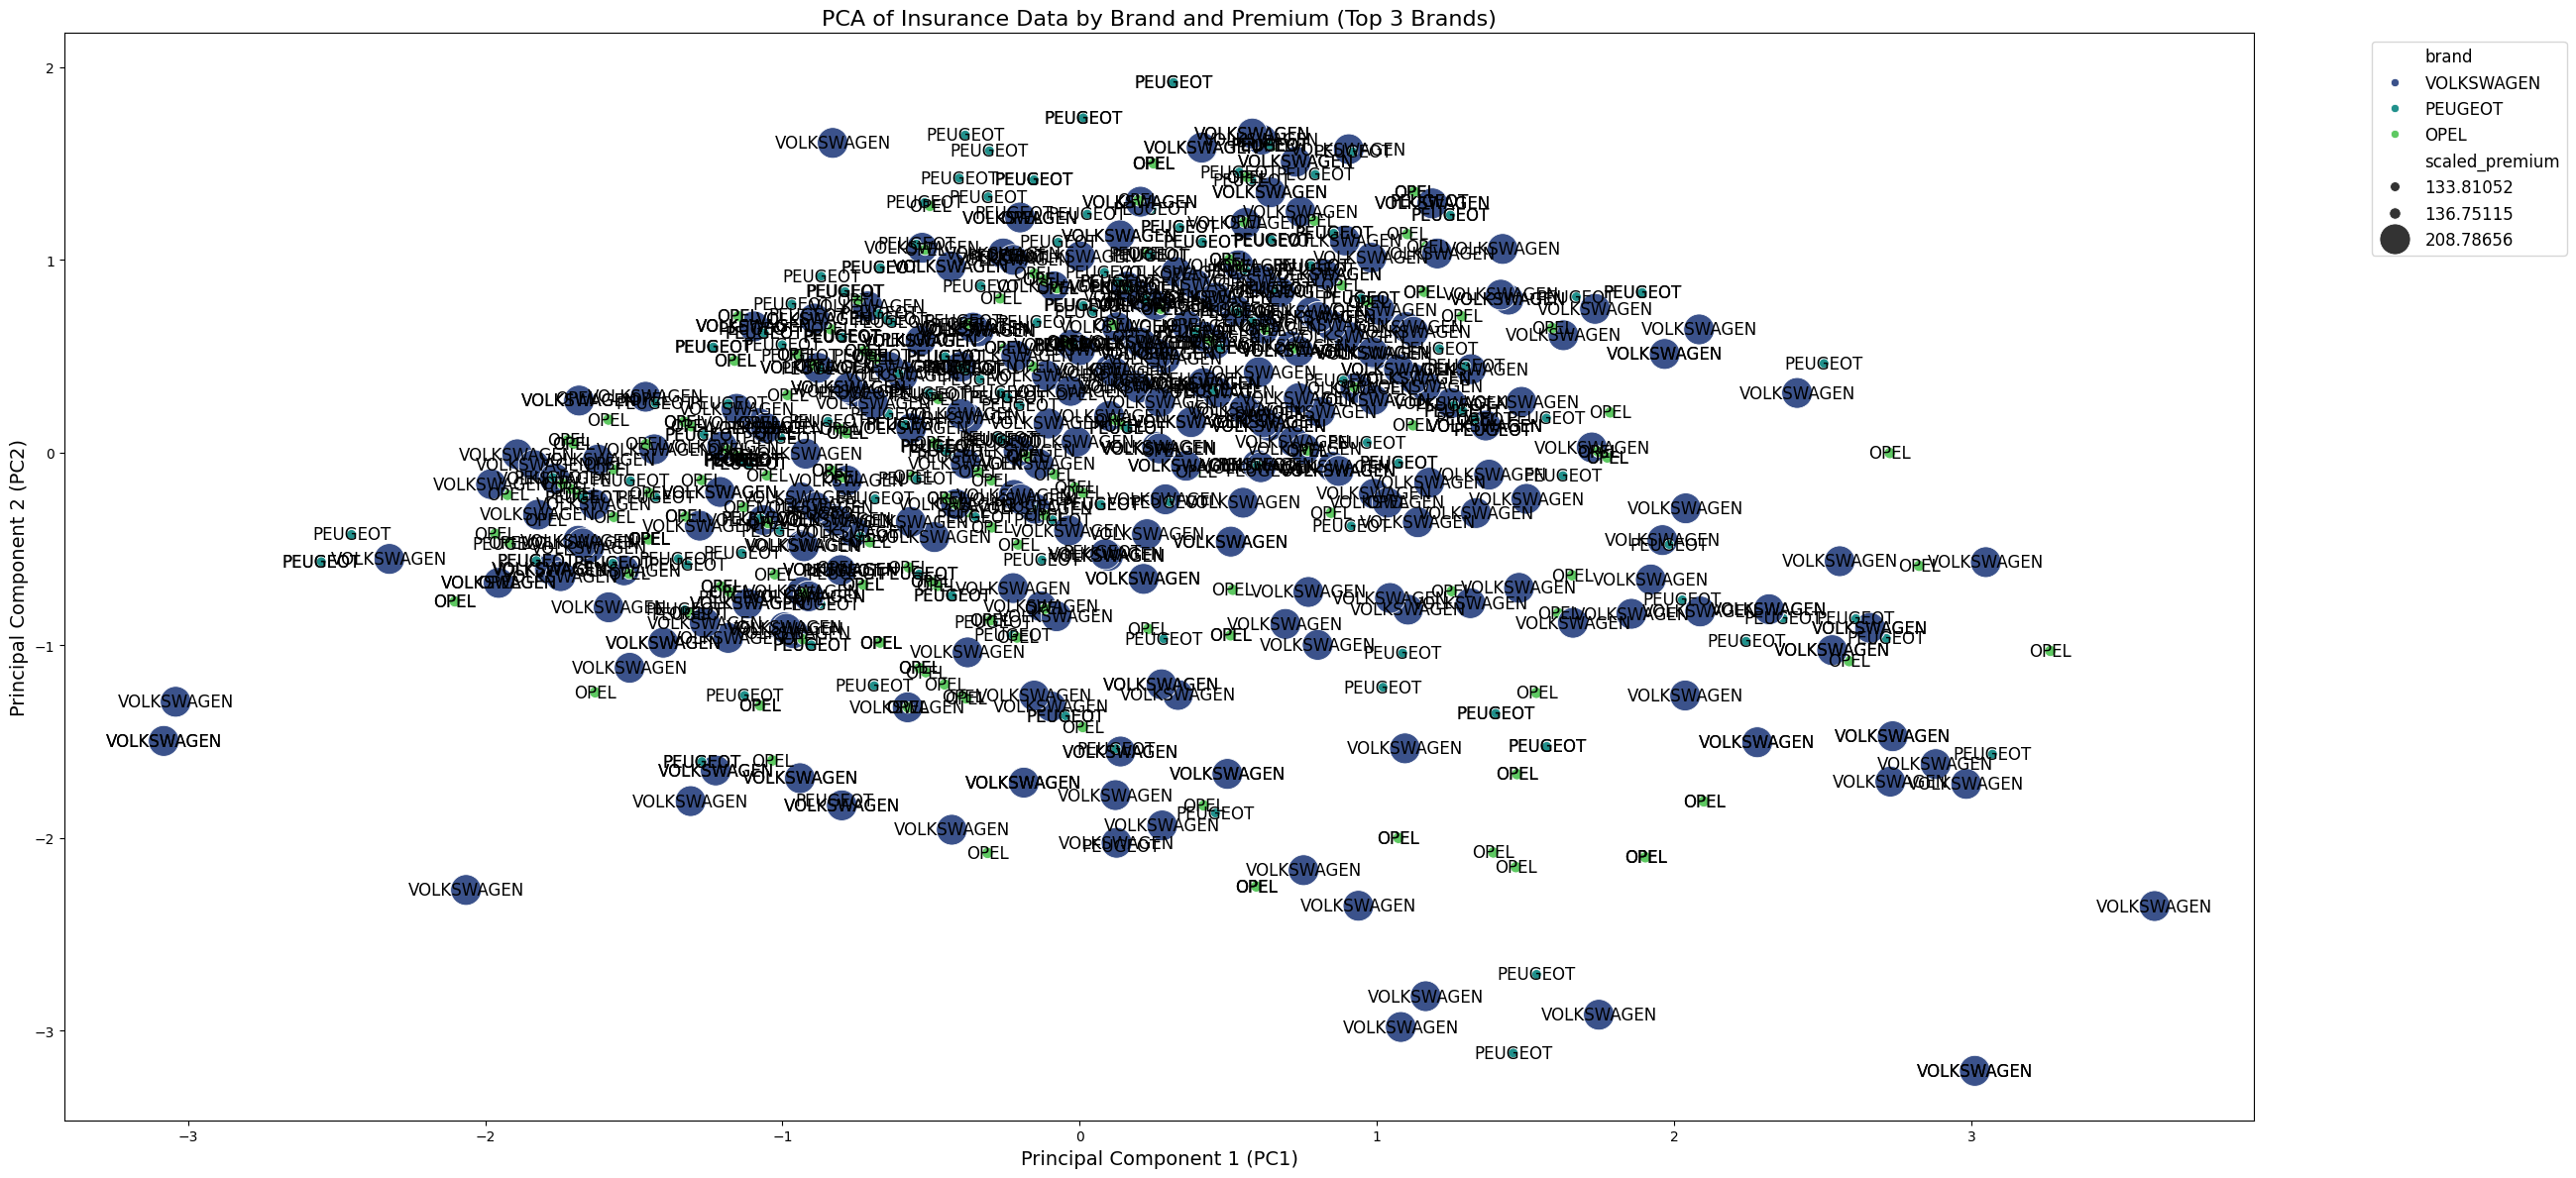


The top brand based on total premium is: VOLKSWAGEN


In [ ]:
!pip install factor_analyzer
!pip install adjustText

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load and preprocess data
df = pd.read_excel('/content/W27307-XLS-ENG.xlsx', sheet_name='funnel_data')

# 2. Handle missing values and convert 'policy_start_date' to datetime
# Fill NaN values in numerical features with 0
numerical_features = ['premium', 'buildyear_car', 'wa', 'wa_bep_ca', 'wa_ca']
for feature in numerical_features:
    df[feature] = pd.to_numeric(df[feature], errors='coerce').fillna(0)

# Convert 'policy_start_date' to datetime
df['policy_start_date'] = pd.to_datetime(df['policy_start_date'], errors='coerce')

# Drop rows with NaN values in 'brand' or 'policy_start_date'
df = df.dropna(subset=['brand', 'policy_start_date'])

# ... (Rest of the PCA code remains the same) ...

# --- Calculate Total Premium by Brand ---
brand_premium = df.groupby('brand')['premium'].sum().reset_index()

# --- Select Top 3 Brands ---
top_3_brands = brand_premium.sort_values(by='premium', ascending=False).head(3)

# --- Filter data for top 3 brands ---
df_top3 = df[df['brand'].isin(top_3_brands['brand'])]

# --- Standardize data for top 3 brands ---
X_top3 = df_top3[numerical_features]
scaler_top3 = StandardScaler()
X_scaled_top3 = scaler_top3.fit_transform(X_top3)

# --- Perform PCA for top 3 brands ---
pca_top3 = PCA(n_components=2)  # Choose 2 components for visualization
principal_components_top3 = pca_top3.fit_transform(X_scaled_top3)

# --- Create DataFrame for top 3 brands PCA plot ---
principal_df_top3 = pd.DataFrame(data=principal_components_top3, columns=['PC1', 'PC2'])
principal_df_top3['brand'] = df_top3['brand'].values

# --- Calculate and display Eigenvalues and Explained Variance ---
eigenvalues = pca_top3.explained_variance_
explained_variance_ratio = pca_top3.explained_variance_ratio_

print("Eigenvalues:", eigenvalues)
print("Explained Variance Ratio:", explained_variance_ratio)

# --- Visualization with Brand Names and Total Premium ---

# Calculate total premium by brand and merge with principal_df
brand_premium_top3 = df_top3.groupby('brand')['premium'].sum().reset_index().rename(columns={'premium': 'total_premium'})
principal_df_top3 = pd.merge(principal_df_top3, brand_premium_top3, on='brand', how='left')

# Adjust figure size and font sizes for better readability
plt.figure(figsize=(26, 12))  # Adjusted figure size
# Scale 'total_premium' for better visualization (adjust scaling factor as needed)
principal_df_top3['scaled_premium'] = principal_df_top3['total_premium'] / 1000  # Scaling by 1000
sns.scatterplot(x='PC1', y='PC2', size='scaled_premium', hue='brand', data=principal_df_top3, palette='viridis', sizes=(50, 500))
plt.title('PCA of Insurance Data by Brand and Premium (Top 3 Brands)', fontsize=16)
plt.xlabel('Principal Component 1 (PC1)', fontsize=14)
plt.ylabel('Principal Component 2 (PC2)', fontsize=14)

# Add brand names as text labels with adjustments
for i, row in principal_df_top3.iterrows():
    plt.text(row['PC1'], row['PC2'], row['brand'], fontsize=12, ha='center', va='center')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.tight_layout()
plt.show()

# Identify the top brand based on total premium
top_brand = principal_df_top3.loc[principal_df_top3['total_premium'].idxmax(), 'brand']
print(f"\nThe top brand based on total premium is: {top_brand}")

Eigenvalues: [1.18969262 0.81278569]
Explained Variance Ratio: [0.59411012 0.40588988]


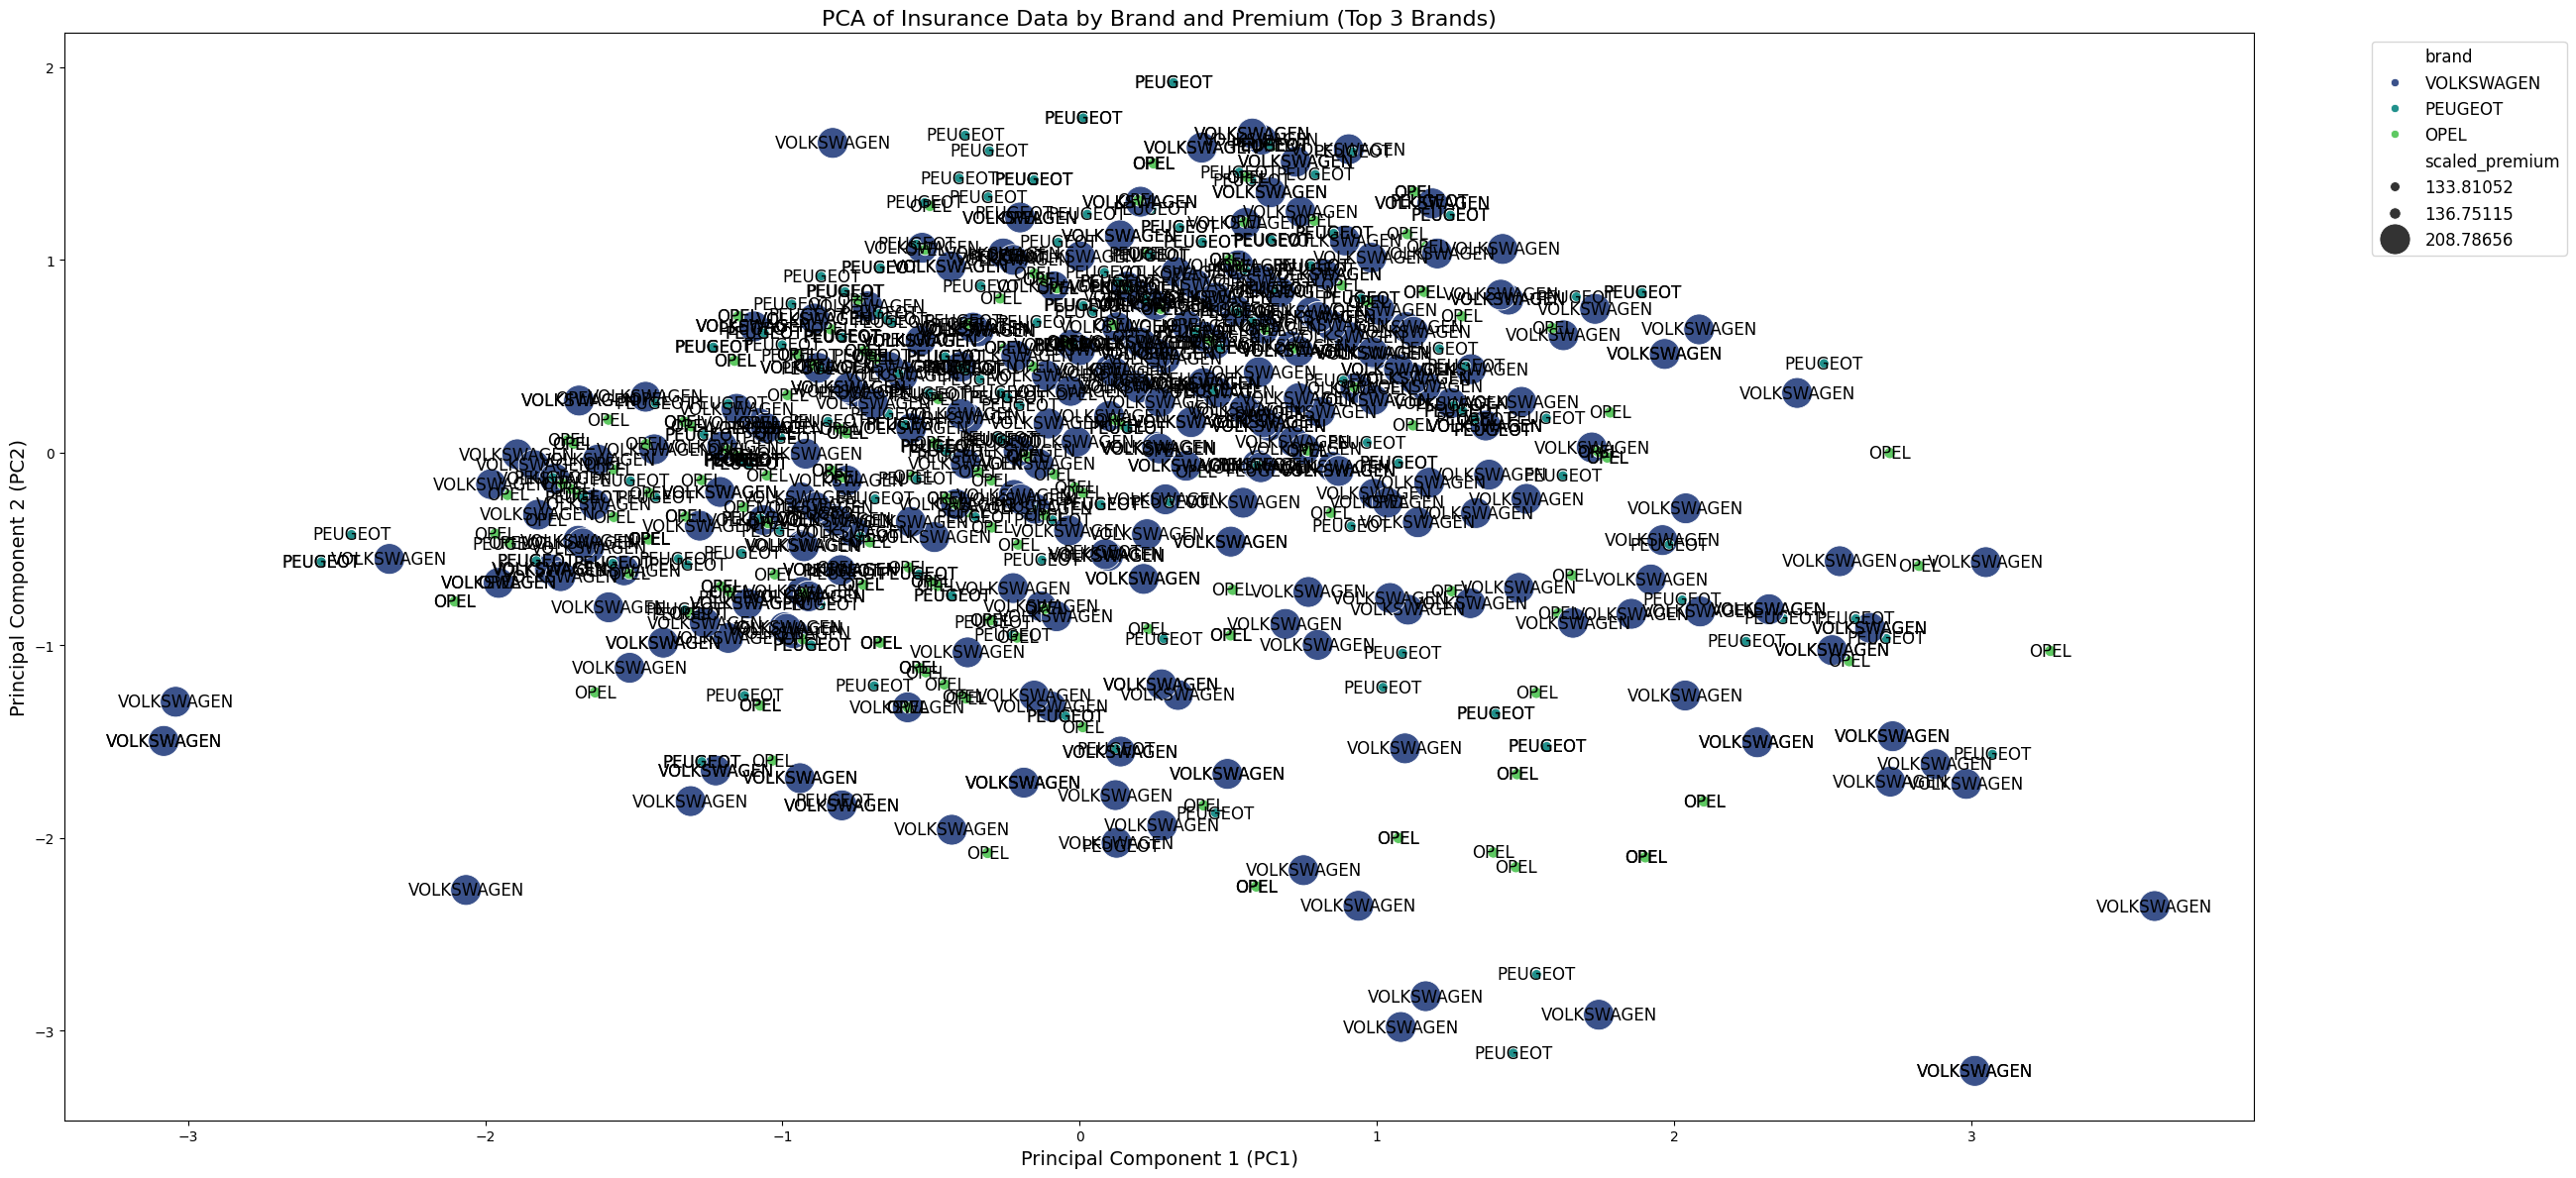

In [ ]:
!pip install factor_analyzer
!pip install adjustText

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load and preprocess data
df = pd.read_excel('/content/W27307-XLS-ENG.xlsx', sheet_name='funnel_data')

# 2. Handle missing values and convert 'policy_start_date' to datetime
# Fill NaN values in numerical features with 0
numerical_features = ['premium', 'buildyear_car', 'wa', 'wa_bep_ca', 'wa_ca']
for feature in numerical_features:
    df[feature] = pd.to_numeric(df[feature], errors='coerce').fillna(0)

# Convert 'policy_start_date' to datetime
df['policy_start_date'] = pd.to_datetime(df['policy_start_date'], errors='coerce')

# Drop rows with NaN values in 'brand' or 'policy_start_date'
df = df.dropna(subset=['brand', 'policy_start_date'])

# ... (Rest of the PCA code remains the same) ...

# --- Calculate Total Premium by Brand ---
brand_premium = df.groupby('brand')['premium'].sum().reset_index()

# --- Select Top 3 Brands ---
top_3_brands = brand_premium.sort_values(by='premium', ascending=False).head(3)

# --- Filter data for top 3 brands ---
df_top3 = df[df['brand'].isin(top_3_brands['brand'])]

# --- Standardize data for top 3 brands ---
X_top3 = df_top3[numerical_features]
scaler_top3 = StandardScaler()
X_scaled_top3 = scaler_top3.fit_transform(X_top3)

# --- Perform PCA for top 3 brands ---
pca_top3 = PCA(n_components=2)  # Choose 2 components for visualization
principal_components_top3 = pca_top3.fit_transform(X_scaled_top3)

# --- Create DataFrame for top 3 brands PCA plot ---
principal_df_top3 = pd.DataFrame(data=principal_components_top3, columns=['PC1', 'PC2'])
principal_df_top3['brand'] = df_top3['brand'].values

# --- Calculate and display Eigenvalues and Explained Variance ---
eigenvalues = pca_top3.explained_variance_
explained_variance_ratio = pca_top3.explained_variance_ratio_

print("Eigenvalues:", eigenvalues)
print("Explained Variance Ratio:", explained_variance_ratio)

# --- Visualization with Brand Names and Total Premium ---

# Calculate total premium by brand and merge with principal_df
brand_premium_top3 = df_top3.groupby('brand')['premium'].sum().reset_index().rename(columns={'premium': 'total_premium'})
principal_df_top3 = pd.merge(principal_df_top3, brand_premium_top3, on='brand', how='left')

# Adjust figure size and font sizes for better readability
plt.figure(figsize=(26, 12))  # Adjusted figure size
# Scale 'total_premium' for better visualization (adjust scaling factor as needed)
principal_df_top3['scaled_premium'] = principal_df_top3['total_premium'] / 1000  # Scaling by 1000
sns.scatterplot(x='PC1', y='PC2', size='scaled_premium', hue='brand', data=principal_df_top3, palette='viridis', sizes=(50, 500))
plt.title('PCA of Insurance Data by Brand and Premium (Top 3 Brands)', fontsize=16)
plt.xlabel('Principal Component 1 (PC1)', fontsize=14)
plt.ylabel('Principal Component 2 (PC2)', fontsize=14)

# Add brand names as text labels with adjustments
for i, row in principal_df_top3.iterrows():
    plt.text(row['PC1'], row['PC2'], row['brand'], fontsize=12, ha='center', va='center')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.tight_layout()
plt.show()

Eigenvalues: [1.20613287 0.79410201]
Explained Variance Ratio: [0.60299562 0.39700438]


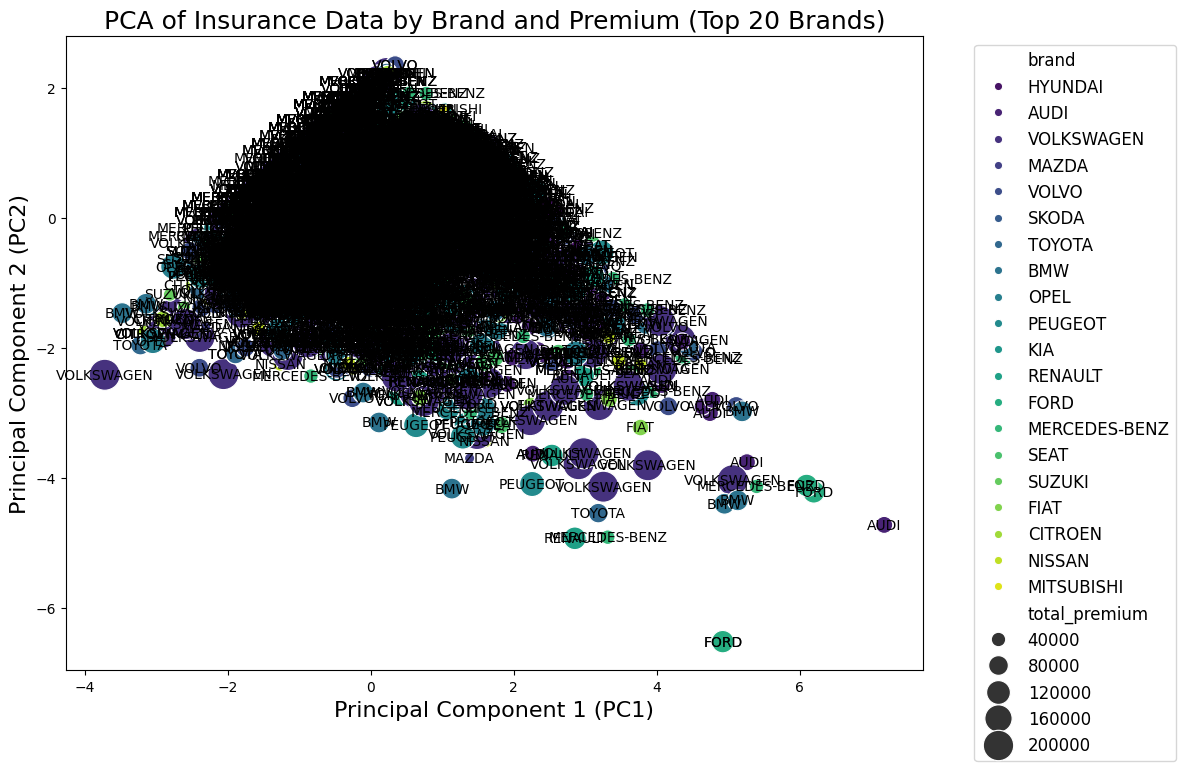

In [ ]:
!pip install factor_analyzer
!pip install adjustText

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load and preprocess data
df = pd.read_excel('/content/W27307-XLS-ENG.xlsx', sheet_name='funnel_data')

# 2. Handle missing values and convert 'policy_start_date' to datetime
# Fill NaN values in numerical features with 0
numerical_features = ['premium', 'buildyear_car', 'wa', 'wa_bep_ca', 'wa_ca']
for feature in numerical_features:
    df[feature] = pd.to_numeric(df[feature], errors='coerce').fillna(0)

# Convert 'policy_start_date' to datetime
df['policy_start_date'] = pd.to_datetime(df['policy_start_date'], errors='coerce')

# Drop rows with NaN values in 'brand' or 'policy_start_date'
df = df.dropna(subset=['brand', 'policy_start_date'])

# ... (Rest of the PCA code remains the same) ...

# --- PCA for Top 20 Brands (Same as before) ---
# 12. Standardize data for top 20 brands
X_top20 = df_top20[numerical_features]
scaler_top20 = StandardScaler()
X_scaled_top20 = scaler_top20.fit_transform(X_top20)

# 13. Perform PCA for top 20 brands
pca_top20 = PCA(n_components=2)  # Choose 2 components for visualization
principal_components_top20 = pca_top20.fit_transform(X_scaled_top20)

# 14. Create DataFrame for top 20 brands PCA plot
principal_df_top20 = pd.DataFrame(data=principal_components_top20, columns=['PC1', 'PC2'])
principal_df_top20['brand'] = df_top20['brand'].values

# --- Calculate and display Eigenvalues and Explained Variance ---
eigenvalues = pca_top20.explained_variance_
explained_variance_ratio = pca_top20.explained_variance_ratio_

print("Eigenvalues:", eigenvalues)
print("Explained Variance Ratio:", explained_variance_ratio)

# --- Visualization with Brand Names and Total Premium ---

# Calculate total premium by brand and merge with principal_df
brand_premium = df.groupby('brand')['premium'].sum().reset_index().rename(columns={'premium': 'total_premium'})
principal_df = pd.merge(principal_df_top20, brand_premium, on='brand', how='left')  # Use principal_df_top20 here

# Adjust figure size and font sizes for better readability
plt.figure(figsize=(12, 8))  # Increased figure size
sns.scatterplot(x='PC1', y='PC2', size='total_premium', hue='brand', data=principal_df, palette='viridis', sizes=(50, 500))
plt.title('PCA of Insurance Data by Brand and Premium (Top 20 Brands)', fontsize=18)  # Increased title font size
plt.xlabel('Principal Component 1 (PC1)', fontsize=16)  # Increased label font size
plt.ylabel('Principal Component 2 (PC2)', fontsize=16)  # Increased label font size

# Add brand names as text labels with adjustments
for i, row in principal_df.iterrows():
    plt.text(row['PC1'], row['PC2'], row['brand'], fontsize=10, ha='center', va='center')  # Adjusted font size

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)  # Adjusted legend font size
plt.tight_layout()
plt.show()

In [ ]:
# Calculate total premium by brand
brand_premium = df.groupby('brand')['premium'].sum().reset_index()

# Select top 100 brands
top_100_brands = brand_premium.sort_values(by='premium', ascending=False).head(100)

# Filter data for top 100 brands
df_top100 = df[df['brand'].isin(top_100_brands['brand'])]

# ... (rest of the code using df_top100 instead of df) ...

In [ ]:
import pandas as pd

# 1. Load the data
df = pd.read_excel('/content/W27307-XLS-ENG.xlsx', sheet_name='funnel_data')

# 2. Data Cleaning (if necessary)
# ---
# (Handle missing values, data type conversions, etc. as needed)

# 3. Calculate Total Premium by Brand and Date
# ---
# Group by 'brand' and 'policy_start_date' and sum 'premium'
premium_by_brand_date = df.groupby(['brand', 'policy_start_date'])['premium'].sum().reset_index()

# 4. Display the Results
print("Total Premium by Brand and Date:")
print(premium_by_brand_date)

# (Optional) Further Analysis/Visualization
# ---
# You can further analyze or visualize this data using plotting libraries like matplotlib or seaborn.
# For example, you can create a bar chart showing the total premium for each brand over time.

Total Premium by Brand and Date:
           brand policy_start_date  premium
0     ALFA ROMEO        2018-10-20   395.49
1     ALFA ROMEO        2019-01-19   627.84
2     ALFA ROMEO        2019-05-04  1120.68
3     ALFA ROMEO        2019-06-09  1152.36
4     ALFA ROMEO        2019-07-09   488.52
...          ...               ...      ...
1544       VOLVO        2020-03-24  1124.64
1545       VOLVO        2021-02-04  1657.44
1546      YAMAHA        2019-05-05    40.90
1547      YAMAHA        2020-01-01   127.20
1548      YAMAHA        2020-02-02   622.32

[1549 rows x 3 columns]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Load Data:
df = pd.read_excel('/content/W27307-XLS-ENG.xlsx', sheet_name='funnel_data')

# 2. Count and Remove NaN and NaT Values
# ---
# ... (Code to handle NaN and NaT values remains the same)

# 3. Data Cleaning and Preparation:
# ---
# ... (Code to convert 'policy_start_date' to datetime remains the same)

# 4. Calculate Total Premium by Brand and Date
premium_by_brand_date = df.groupby(['brand', 'policy_start_date'])['premium'].sum().reset_index()

# 5. Frequency Analysis
premium_frequency = premium_by_brand_date['premium'].value_counts().sort_index()

# 6. Cumulative Premium
premium_by_brand_date['cumulative_premium'] = premium_by_brand_date.groupby('brand')['premium'].cumsum()

# 7. Prepare data for prediction
# ---
# ... (Code to prepare data for prediction remains the same, but consider adding 'brand' as a feature)

# 8. Train the model and predict
# ---
# ... (Code to train and predict remains the same, but use the updated X and y)

# 9. Display results
# ---
# ... (Code to display Total Premium and Premium Frequency remains the same)

# Display Cumulative Premium
print("\nCumulative Premium by Brand and Date:")
print(premium_by_brand_date[['brand', 'policy_start_date', 'cumulative_premium']])

# Display Predicted Premiums (example)
# ---
# ... (Code to display predicted premiums remains the same)

# (Optional) Visualize premium frequency, cumulative premium, and predictions
# ---
# ... (Add visualization code using matplotlib or seaborn)


Cumulative Premium by Brand and Date:
           brand policy_start_date  cumulative_premium
0     ALFA ROMEO        2018-10-20              395.49
1     ALFA ROMEO        2019-01-19             1023.33
2     ALFA ROMEO        2019-05-04             2144.01
3     ALFA ROMEO        2019-06-09             3296.37
4     ALFA ROMEO        2019-07-09             3784.89
...          ...               ...                 ...
1544       VOLVO        2020-03-24            71983.31
1545       VOLVO        2021-02-04            73640.75
1546      YAMAHA        2019-05-05               40.90
1547      YAMAHA        2020-01-01              168.10
1548      YAMAHA        2020-02-02              790.42

[1549 rows x 3 columns]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Load Data:
df = pd.read_excel('/content/W27307-XLS-ENG.xlsx', sheet_name='funnel_data')

# 2. Count and Remove NaN and NaT Values
# ... (Same code to handle missing values)

# 3. Data Cleaning and Preparation:
# ... (Same code to convert 'policy_start_date' to datetime)

# 4. Calculate Total Premium by Brand
brand_premium = df.groupby('brand')['premium'].sum().reset_index()

# 5. Select Top 20 Brands


Mean Squared Error: 60210172210.048645
R-squared: -0.061534622201989464


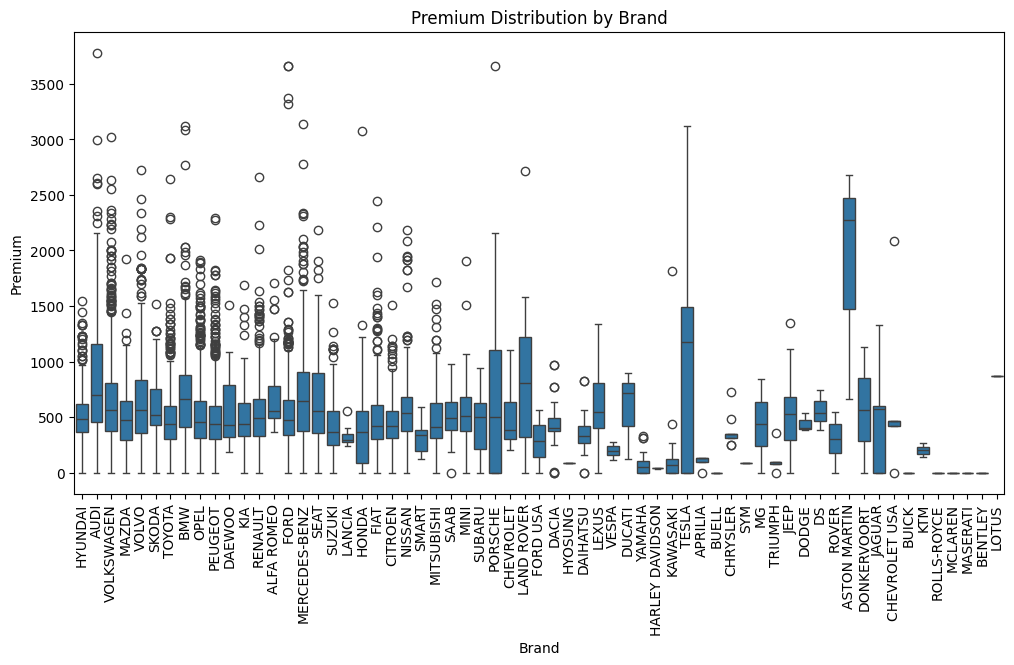

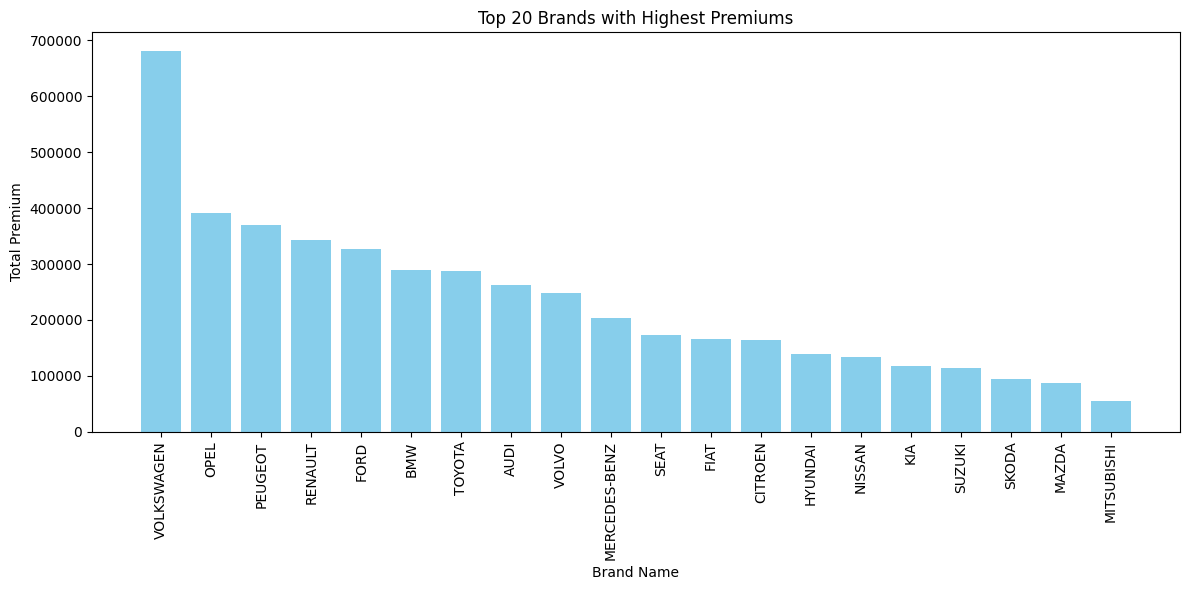

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Load Data:
df = pd.read_excel('/content/W27307-XLS-ENG.xlsx', sheet_name='funnel_data')

# 2. Count and Remove NaN and NaT Values
# ... (Same code to handle missing values)

# 3. Data Cleaning and Preparation:
# ... (Same code to convert 'policy_start_date' to datetime)

# 4. Calculate Total Premium by Brand
brand_premium = df.groupby('brand')['premium'].sum().reset_index()

# 5. Select Top 20 Brands
top_20_brands = brand_premium.sort_values(by='premium', ascending=False).head(20)

# 6. Prepare Data for Regression
X = pd.get_dummies(top_20_brands['brand'], drop_first=True)  # One-hot encode brands
y = top_20_brands['premium']

# 7. Train the Model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

# 8. Predict and Evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# 9. Visualize with Matplotlib
# --- Box Plot for Premium Distribution by Brand ---
plt.figure(figsize=(12, 6))
sns.boxplot(x='brand', y='premium', data=df)  # Create the boxplot
plt.xticks(rotation=90)  # Rotate the x-axis labels by 90 degrees
plt.title('Premium Distribution by Brand')  # Add a title
plt.xlabel('Brand')  # Label for x-axis
plt.ylabel('Premium')  # Label for y-axis
plt.show()  # Display the plot

# --- Bar Chart for Top 20 Brands with Highest Premiums ---
plt.figure(figsize=(12, 6))
plt.bar(top_20_brands['brand'], top_20_brands['premium'], color='skyblue')
plt.xlabel("Brand Name")
plt.ylabel("Total Premium")
plt.title("Top 20 Brands with Highest Premiums")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [ ]:
# Group by 'brand' and calculate frequency
freq_table = df.groupby('brand').size().reset_index(name='frequency')

# Calculate cumulative frequency
freq_table['cumulative_frequency'] = freq_table['frequency'].cumsum()

# Calculate relative frequency
total_frequency = freq_table['frequency'].sum()
freq_table['relative_frequency'] = freq_table['frequency'] / total_frequency

Focus on the Car Brands that have the highest premuims may be one way Allianz can in sales with out have to increase growth sales.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Load Data:
df = pd.read_excel('/content/W27307-XLS-ENG.xlsx', sheet_name='funnel_data')

# 2. Count and Remove NaN and NaT Values
# ... (Same code to handle missing values)

# 3. Data Cleaning and Preparation:
# ... (Same code to convert 'policy_start_date' to datetime)

# 4. Calculate Total Premium by Brand
brand_premium = df.groupby('brand')['premium'].sum().reset_index()

# 5. Select Top 20 Brands
top_20_brands = brand_premium.sort_values(by='premium', ascending=False).head(20)

# --- Discount Analysis ---
# 6. Filter data for top 20 brands
df_top20 = df[df['brand'].isin(top_20_brands['brand'])]

# 7. Calculate potential revenue with discount
discount_rate = 0.10  # 10% discount
df_top20['discounted_premium'] = df_top20['premium'] * (1 - discount_rate)

# 8. Calculate total potential revenue
total_potential_revenue = df_top20['discounted_premium'].sum()

# 9. Calculate potential revenue change
original_revenue = df_top20['premium'].sum()
revenue_change = total_potential_revenue - original_revenue

# --- Regression Model (Optional) ---
# 10. Prepare data for regression (if needed)
# ... (Similar to previous code, using discounted_premium as target)

# 11. Train and predict with regression model (if needed)
# ... (Similar to previous code)

# --- Output Results ---
print(f"Total Potential Revenue with 10% Discount: {total_potential_revenue}")
print(f"Potential Revenue Change: {revenue_change}")

# --- Visualization (Optional) ---
# ... (Visualize potential revenue with/without discount)

Total Potential Revenue with 10% Discount: 4183664.796
Potential Revenue Change: -464851.6439999994


<ipython-input-164-f71965c9cb6f>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<ipython-input-165-3136cd8b52e5>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


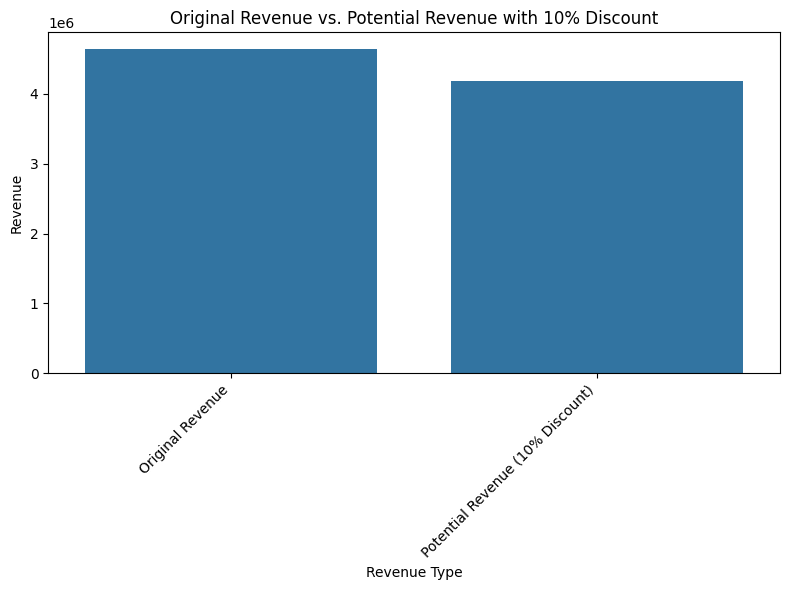

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Load Data:
df = pd.read_excel('/content/W27307-XLS-ENG.xlsx', sheet_name='funnel_data')

# 2. Count and Remove NaN and NaT Values
# ... (Same code to handle missing values)

# 3. Data Cleaning and Preparation:
# ... (Same code to convert 'policy_start_date' to datetime)

# 4. Calculate Total Premium by Brand
brand_premium = df.groupby('brand')['premium'].sum().reset_index()

# 5. Select Top 20 Brands
top_20_brands = brand_premium.sort_values(by='premium', ascending=False).head(20)

# --- Discount Analysis ---
# 6. Filter data for top 20 brands
df_top20 = df[df['brand'].isin(top_20_brands['brand'])]

# 7. Calculate potential revenue with discount
discount_rate = 0.10  # 10% discount
df_top20['discounted_premium'] = df_top20['premium'] * (1 - discount_rate)

# 8. Calculate total potential revenue
total_potential_revenue = df_top20['discounted_premium'].sum()

# 9. Calculate potential revenue change
original_revenue = df_top20['premium'].sum()
revenue_change = total_potential_revenue - original_revenue

# --- Visualization ---
# Create a bar chart to compare original and discounted revenue
revenue_data = {
    'Revenue Type': ['Original Revenue', 'Potential Revenue (10% Discount)'],
    'Revenue': [original_revenue, total_potential_revenue]
}
revenue_df = pd.DataFrame(revenue_data)

plt.figure(figsize=(8, 6))
sns.barplot(x='Revenue Type', y='Revenue', data=revenue_df)
plt.title('Original Revenue vs. Potential Revenue with 10% Discount')
plt.ylabel('Revenue')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

In [ ]:
what is the totla revenue without discount?


In [ ]:
!pip install numpy-financial

import numpy_financial as npf # Import numpy_financial
import pandas as pd
import numpy as np

# 1. Load Data:
df = pd.read_excel('/content/W27307-XLS-ENG.xlsx', sheet_name='funnel_data')

# 2. Count and Remove NaN and NaT Values
# ... (Same code to handle missing values)

# 3. Data Cleaning and Preparation:
# ... (Same code to convert 'policy_start_date' to datetime)

# 4. Calculate Total Premium by Brand
brand_premium = df.groupby('brand')['premium'].sum().reset_index()

# 5. Select Top 20 Brands
top_20_brands = brand_premium.sort_values(by='premium', ascending=False).head(20)

# --- Target Revenue Goal ---
target_revenue_increase = 0.10  # 10% increase
original_revenue = df['premium'].sum()
target_revenue = original_revenue * (1 + target_revenue_increase)

# --- Discount Analysis ---
# 6. Filter data for top 20 brands
df_top20 = df[df['brand'].isin(top_20_brands['brand'])]

# 7. Calculate potential revenue with discount for each brand
discount_amount = 100  # $100 discount
df_top20['discounted_premium'] = df_top20['premium'] - discount_amount

# 8. Calculate total potential revenue by brand
potential_revenue_by_brand = df_top20.groupby('brand')['discounted_premium'].sum().reset_index()

# 9. Sort brands by potential revenue
top_brands_by_potential_revenue = potential_revenue_by_brand.sort_values(by='discounted_premium', ascending=False)

# 10. Identify the best brand to target
best_brand_to_target = top_brands_by_potential_revenue.iloc[0]['brand']  # The brand with the highest potential revenue

# --- Customer Acquisition and Cost ---
# Assume a cost per acquisition (CPA)
cpa = 50  # Example CPA, adjust based on your data

# Calculate the number of new customers needed to reach the target revenue
additional_revenue_needed = target_revenue - original_revenue
break_even_customers = additional_revenue_needed / discount_amount

# Calculate the total acquisition cost for break-even
total_acquisition_cost = break_even_customers * cpa

# --- Customer Acquisition by Brand ---
# Calculate the number of customers needed per brand
customers_per_brand = break_even_customers / len(top_20_brands)

# --- Net Present Value (NPV) ---
# Assume a discount rate for NPV calculation
discount_rate_npv = 0.10  # Example discount rate, adjust as needed

# **Changes here:**
# Use total premiums for cash flows
# Assuming 'premium' column represents total premiums for each policy
cash_flows = [-total_acquisition_cost] + df_top20['premium'].tolist()

# Calculate NPV using numpy_financial
npv = npf.npv(discount_rate_npv, cash_flows)


# --- Output Results ---
print("Top Brands by Potential Revenue with $100 Discount:")
print(top_brands_by_potential_revenue)
print(f"\nBest Brand to Target for Discount: {best_brand_to_target}")
print(f"\nBreak-Even Customers: {break_even_customers:.0f}")
print(f"Total Acquisition Cost for Break-Even: {total_acquisition_cost:.2f}")
print(f"Customers Needed per Brand (approximately): {customers_per_brand:.0f}")
print(f"Net Present Value (NPV): {npv:.2f}")

# --- Decision ---
if npv > 0:
    print("\nIt is worth offering the discount based on the NPV analysis.")
else:
    print("\nIt is not worth offering the discount based on the NPV analysis.")

Top Brands by Potential Revenue with $100 Discount:
            brand  discounted_premium
18     VOLKSWAGEN           575074.36
11           OPEL           316877.27
12        PEUGEOT           295894.15
13        RENAULT           279137.50
4            FORD           266743.18
1             BMW           247992.64
0            AUDI           230810.72
17         TOYOTA           229117.90
19          VOLVO           210996.23
8   MERCEDES-BENZ           174492.06
14           SEAT           146158.73
3            FIAT           133250.59
2         CITROEN           127166.79
5         HYUNDAI           112579.21
10         NISSAN           111179.99
6             KIA            93017.96
16         SUZUKI            85947.99
15          SKODA            78986.29
7           MAZDA            70021.80
9      MITSUBISHI            44671.08

Best Brand to Target for Discount: VOLKSWAGEN

Break-Even Customers: 5030
Total Acquisition Cost for Break-Even: 251483.66
Customers Needed per Brand

<ipython-input-171-1e58bd64dad2>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.11/dist-packages/numpy_financial/_financial.py:781: RuntimeWarning: overflow encountered in power


In [ ]:
import pandas as pd
# ... (other imports and code) ...

# --- Profitability Analysis ---
cpa = 50  # Example CPA, adjust based on your data

# --- Discount Analysis ---
# ... (code to calculate potential revenue with discount) ...

# --- Customer Acquisition ---
new_customers = 500  # Set the number of new customers to 500
total_acquisition_cost = new_customers * cpa

# --- Profit Calculation ---
total_revenue_with_discount = new_customers * (df_top20['premium'].mean() * (1 - discount_rate))
total_revenue_without_discount = new_customers * df_top20['premium'].mean()
profit = total_revenue_with_discount - total_acquisition_cost
profit_beyond_break_even = profit - abs(revenue_change)

# --- Output Results ---
print(f"Total Potential Revenue with 10% Discount (500 new customers): {total_revenue_with_discount:.2f}")
print(f"Potential Revenue Change: {revenue_change:.2f}")
print(f"Profit with 500 new customers: {profit:.2f}")
print(f"Profit beyond break-even cost: {profit_beyond_break_even:.2f}")

# ... (rest of the code) ...

Total Potential Revenue with 10% Discount (500 new customers): 255600.24
Potential Revenue Change: -464851.64
Profit with 500 new customers: 230600.24
Profit beyond break-even cost: -234251.40


In [ ]:
!pip install numpy-financial

import pandas as pd
import numpy_financial as npf # Import numpy_financial

# 1. Load Data:
df = pd.read_excel('/content/W27307-XLS-ENG.xlsx', sheet_name='funnel_data')

# 2. Count and Remove NaN and NaT Values
# ---

# Count NaN values in each column
nan_counts = df.isna().sum()
print("NaN Counts:\n", nan_counts)

# Count NaT values in the 'policy_start_date' column
nat_count = df['policy_start_date'].isnull().sum()
print("\nNaT Count in 'policy_start_date':", nat_count)

# Remove rows with NaN or NaT

NaN Counts:
 affinity_name           0
status_report           2
offer_number            0
policy_number        6801
zipcode_link            0
zip4                    0
birth_date            143
brand                   3
date_offer              0
date_request         6801
policy_start_date    6697
premium               379
buildyear_car           3
buildmonth_car          3
wa                   5792
wa_bep_ca            6312
wa_ca                5282
updated_on              0
dtype: int64

NaT Count in 'policy_start_date': 6697


In [ ]:
!pip install numpy-financial

import pandas as pd
import numpy_financial as npf # Import numpy_financial

# 1. Load Data:
df = pd.read_excel('/content/W27307-XLS-ENG.xlsx', sheet_name='funnel_data')

# 2. Count and Remove NaN and NaT Values
# ---

# Count NaN values in each column
nan_counts = df.isna().sum()
print("NaN Counts:\n", nan_counts)

# Count NaT values in the 'policy_start_date' column
nat_count = df['policy_start_date'].isnull().sum()
print("\nNaT Count in 'policy_start_date':", nat_count)

# Remove rows with NaN or NaT values in required columns
required_cols = ['status_report', 'brand', 'premium', 'policy_start_date']
df = df.dropna(subset=required_cols)

# 3. Data Cleaning and Preparation:
# ---
# Convert 'policy_start_date' to datetime if it's not already
if not pd.api.types.is_datetime64_any_dtype(df['policy_start_date']):
    df['policy_start_date'] = pd.to_datetime(df['policy_start_date'])

# ---

# 4. Calculate Total Premium by Brand
brand_premium = df.groupby('brand')['premium'].sum().reset_index()

# 5. Select Top 20 Brands
top_20_brands = brand_premium.sort_values(by='premium', ascending=False).head(20)

# --- Discount Analysis ---
# 6. Filter data for top 20 brands
df_top20 = df[df['brand'].isin(top_20_brands['brand'])]

# --- Profitability Analysis ---
cpa = 50  # Example CPA, adjust based on your data
new_customers = 500  # Set the number of new customers to 500
discount_amount = 50  # $50 discount
discount_rate = discount_amount / 100  # Discount rate as a percentage


# 7. Calculate potential revenue with discount for each brand
df_top20['discounted_premium'] = df_top20['premium'] * (1 - discount_rate)

# 8. Calculate total potential revenue by brand
potential_revenue_by_brand = df_top20.groupby('brand')['discounted_premium'].sum().reset_index()

# 9. Sort brands by potential revenue
top_brands_by_potential_revenue = potential_revenue_by_brand.sort_values(by='discounted_premium', ascending=False)

# 10. Identify the best brand to target
best_brand_to_target = top_brands_by_potential_revenue.iloc[0]['brand']  # The brand with the highest potential revenue

# --- Target Revenue Goal ---
target_revenue_increase = 0.10  # 10% increase
original_revenue = df['premium'].sum()
target_revenue = original_revenue * (1 + target_revenue_increase)

# --- Customer Acquisition and Cost ---

# Calculate the number of new customers needed to reach the target revenue
additional_revenue_needed = target_revenue - original_revenue
break_even_customers = additional_revenue_needed / discount_amount

# Calculate the total acquisition cost for break-even
total_acquisition_cost = break_even_customers * cpa

# --- Customer Acquisition by Brand ---
# Calculate the number of customers needed per brand
customers_per_brand = break_even_customers / len(top_20_brands)

# --- Net Present Value (NPV) ---
# Assume a discount rate for NPV calculation
discount_rate_npv = 0.10  # Example discount rate, adjust as needed

# Use total premiums for cash flows
# Assuming 'premium' column represents total premiums for each policy
cash_flows = [-total_acquisition_cost] + df_top20['premium'].tolist()

# Calculate NPV using numpy_financial
npv = npf.npv(discount_rate_npv, cash_flows)

# --- Output Results ---
print("Top Brands by Potential Revenue with $50 Discount:")
print(top_brands_by_potential_revenue)
print(f"\nBest Brand to Target for Discount: {best_brand_to_target}")
print(f"\nBreak-Even Customers: {break_even_customers:.0f}")
print(f"Total Acquisition Cost for Break-Even: {total_acquisition_cost:.2f}")
print(f"Customers Needed per Brand (approximately): {customers_per_brand:.0f}")
print(f"Net Present Value (NPV): {npv:.2f}")

NaN Counts:
 affinity_name           0
status_report           2
offer_number            0
policy_number        6801
zipcode_link            0
zip4                    0
birth_date            143
brand                   3
date_offer              0
date_request         6801
policy_start_date    6697
premium               379
buildyear_car           3
buildmonth_car          3
wa                   5792
wa_bep_ca            6312
wa_ca                5282
updated_on              0
dtype: int64

NaT Count in 'policy_start_date': 6697
Top Brands by Potential Revenue with $50 Discount:
            brand  discounted_premium
18     VOLKSWAGEN          104393.280
11           OPEL           68375.575
12        PEUGEOT           66905.260
13        RENAULT           54142.150
4            FORD           52778.130
1             BMW           45203.320
17         TOYOTA           39461.500
19          VOLVO           36820.375
14           SEAT           31355.225
0            AUDI           29175.5

<ipython-input-177-ef5f45411476>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
df_volkswagen = df_top20[df_top20['brand'] == 'VOLKSWAGEN']

In [ ]:
total_potential_revenue_volkswagen = (df_volkswagen['premium'] - discount_amount).sum()

In [ ]:
original_revenue_volkswagen = df_volkswagen['premium'].sum()
revenue_change_volkswagen = total_potential_revenue_volkswagen - original_revenue_volkswagen

In [ ]:
import pandas as pd
# ... (other imports and code) ...

# --- Profitability Analysis ---
# Assume a cost per acquisition (CPA)
cpa = 50  # Example CPA, adjust based on your data

# --- Discount Analysis ---
# ... (code to calculate potential revenue with discount) ...

# Calculate the number of new customers needed to break even
# This is now more accurate
break_even_customers = abs(revenue_change) / (discount_rate * df_top20['premium'].mean())

# Calculate the total acquisition cost for break-even
total_acquisition_cost = break_even_customers * cpa

# --- NPV Calculation ---
discount_rate_npv = 0.10  # Example discount rate, adjust as needed
time_period = 5  # Number of years to consider

# Calculate cash flows (initial investment and yearly revenue)
# Additional revenue needed each year to reach target
additional_revenue_needed = target_revenue - original_revenue
yearly_revenue = additional_revenue_needed / time_period # Distribute over years

cash_flows = [-total_acquisition_cost] + [yearly_revenue] * time_period

npv = npf.npv(discount_rate_npv, cash_flows)

# ... (rest of the code to print results and visualize) ...

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Load Data:
df = pd.read_excel('/content/W27307-XLS-ENG.xlsx', sheet_name='funnel_data')

# 2. Count and Remove NaN and NaT Values
# ... (Same code to handle missing values)

# 3. Data Cleaning and Preparation:
# ... (Same code to convert 'policy_start_date' to datetime)

# 4. Calculate Total Premium by Brand
brand_premium = df.groupby('brand')['premium'].sum().reset_index()

# 5. Select Top 20 Brands
top_20_brands = brand_premium.sort_values(by='premium', ascending=False).head(20)

# --- Discount Analysis ---
# 6. Filter data for top 20 brands
df_top20 = df[df['brand'].isin(top_20_brands['brand'])]

# 7. Calculate potential revenue with discount
discount_rate = 0.10  # 10% discount
df_top20['discounted_premium'] = df_top20['premium'] * (1 - discount_rate)

# 8. Calculate total potential revenue
total_potential_revenue = df_top20['discounted_premium'].sum()

# 9. Calculate potential revenue change
original_revenue = df_top20['premium'].sum()
revenue_change = total_potential_revenue - original_revenue


# --- Profitability Analysis ---
# Assume a cost per acquisition (CPA)
cpa = 50  # Example CPA, adjust based on your data

# Calculate the number of new customers needed to break even
break_even_customers = abs(revenue_change) / (discount_rate * df_top20['premium'].mean())  # Corrected calculation

# Calculate the total acquisition cost for break-even
total_acquisition_cost = break_even_customers * cpa

# --- Customer Acquisition by Brand ---
# Calculate the number of customers needed per brand
customers_per_brand = break_even_customers / len(top_20_brands)

# --- Output Results ---
print(f"Total Potential Revenue with 10% Discount: {total_potential_revenue}")
print(f"Potential Revenue Change: {revenue_change}")
print(f"Break-Even Customers: {break_even_customers:.0f}")
print(f"Total Acquisition Cost for Break-Even: {total_acquisition_cost:.2f}")
print(f"Customers Needed per Brand (approximately): {customers_per_brand:.0f}")

# --- Visualization (Optional) ---
# ... (Visualize potential revenue with/without discount)

Total Potential Revenue with 10% Discount: 4183664.796
Potential Revenue Change: -464851.6439999994
Break-Even Customers: 8184
Total Acquisition Cost for Break-Even: 409200.00
Customers Needed per Brand (approximately): 409


<ipython-input-166-d8f289715003>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<ipython-input-169-abfa6330e8ed>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



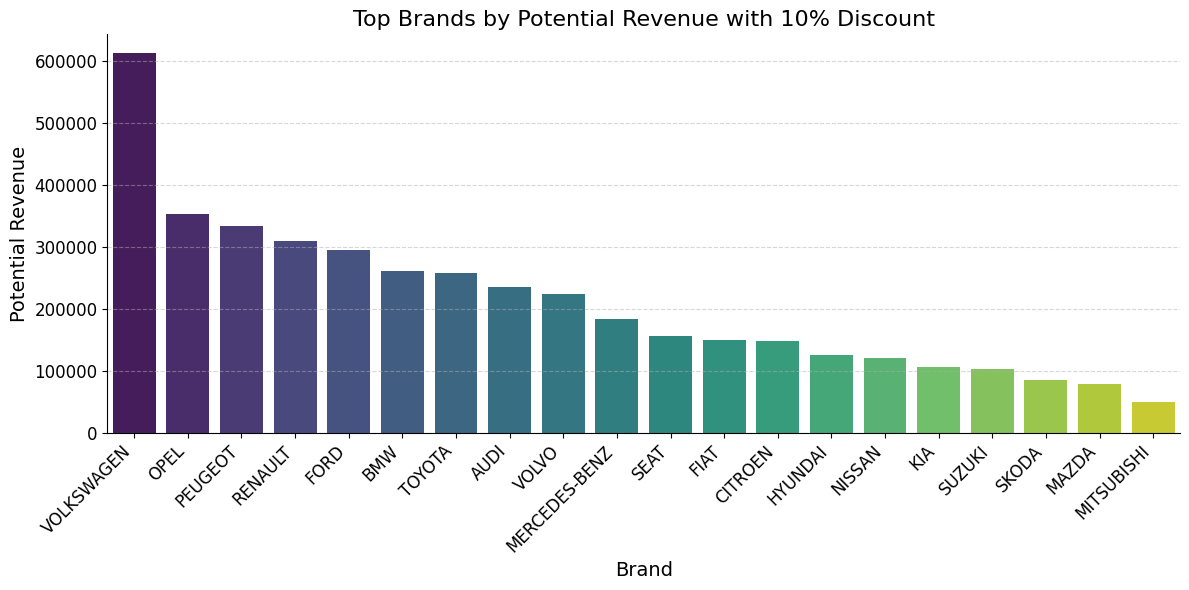

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ... (Previous code to load data, calculate potential revenue, and sort brands) ...

# --- Visualization ---
# Create a colorful bar plot of top brands by potential revenue with discount
plt.figure(figsize=(12, 6))
sns.barplot(x='brand', y='discounted_premium', data=top_brands_by_potential_revenue, palette='viridis')  # Use a vibrant color palette
plt.title('Top Brands by Potential Revenue with 10% Discount', fontsize=16)
plt.xlabel('Brand', fontsize=14)
plt.ylabel('Potential Revenue', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels for readability
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)  # Add a subtle grid
sns.despine()  # Remove top and right spines for a cleaner look
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Load Data:
df = pd.read_excel('/content/W27307-XLS-ENG.xlsx', sheet_name='funnel_data')

# 2. Count and Remove NaN and NaT Values
# ---

# Count NaN values in each column
nan_counts = df.isna().sum()
print("NaN Counts:\n", nan_counts)

# Count NaT values in the 'policy_start_date' column
nat_count = df['policy_start_date'].isnull().sum()
print("\nNaT Count in 'policy_start_date':", nat_count)

# Remove rows with NaN or NaT values in required columns
required_cols = ['status_report', 'brand', 'premium', 'policy_start_date']
df = df.dropna(subset=required_cols)

# 3. Data Cleaning and Preparation:
# ---
# Convert 'policy_start_date' to datetime if it's not already
if not pd.api.types.is_datetime64_any_dtype(df['policy_start_date']):
    df['policy_start_date'] = pd.to_datetime(df['policy_start_date'])

# 4. Exploratory Data Analysis (EDA)
# ---
# ... (rest of the code remains the same as before) ...

NaN Counts:
 affinity_name           0
status_report           2
offer_number            0
policy_number        6801
zipcode_link            0
zip4                    0
birth_date            143
brand                   3
date_offer              0
date_request         6801
policy_start_date    6697
premium               379
buildyear_car           3
buildmonth_car          3
wa                   5792
wa_bep_ca            6312
wa_ca                5282
updated_on              0
dtype: int64

NaT Count in 'policy_start_date': 6697


In [ ]:
# ... (previous code) ...

# One-hot encode categorical features
# Include all columns with object (string) dtype
categorical_cols = X_train.select_dtypes(include=['object']).columns
X_train = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_test = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

# Align columns after one-hot encoding
X_train, X_test = X_train.align(X_test, join='left', axis=1)
X_test.fillna(0, inplace=True) # Fill missing values with 0

# ... (rest of the code) ...

<ipython-input-73-a9f4c3b5f285>:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  X_test.fillna(0, inplace=True) # Fill missing values with 0


In [ ]:
# Example derived features
df['policy_duration_days'] = (df['policy_start_date'] - df['date_request']).dt.days
df['customer_age'] = (pd.Timestamp.now() - df['birth_date']).dt.days // 365

# One-hot encode categorical variables
categorical_cols = ['affinity_name', 'status_report', 'brand']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

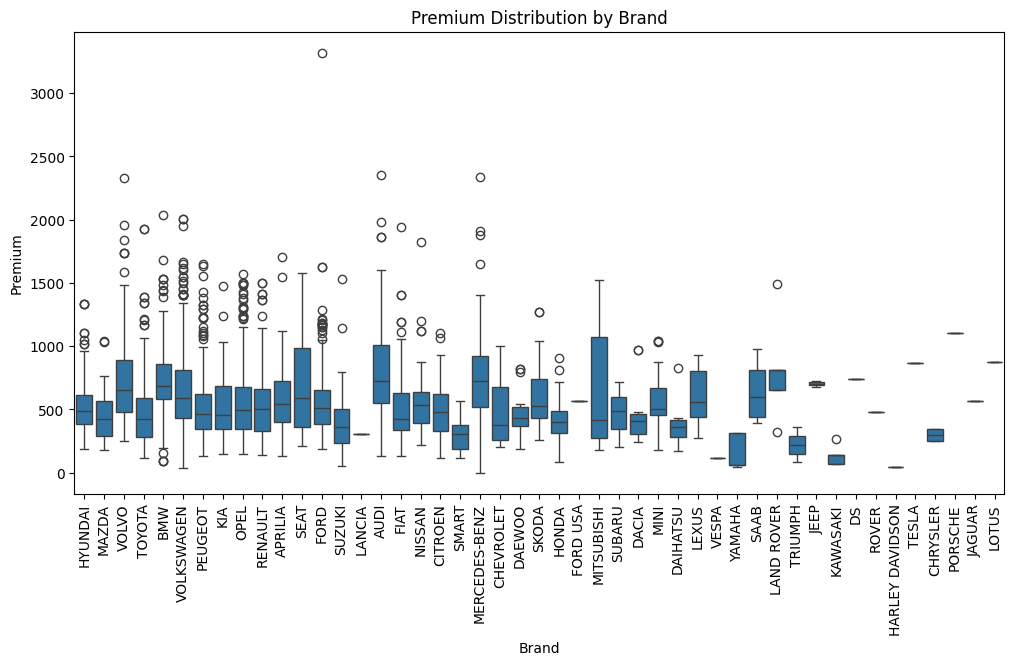

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))  # Adjust figure size for clarity
sns.boxplot(x='brand', y='premium', data=df)  # Create the boxplot

# Rotate the brand names vertically
plt.xticks(rotation=90)  # Rotate the x-axis labels by 90 degrees
plt.title('Premium Distribution by Brand')  # Add a title
plt.xlabel('Brand')  # Label for x-axis
plt.ylabel('Premium')  # Label for y-axis

plt.show()  # Display the plot

Policy Date Data Frame

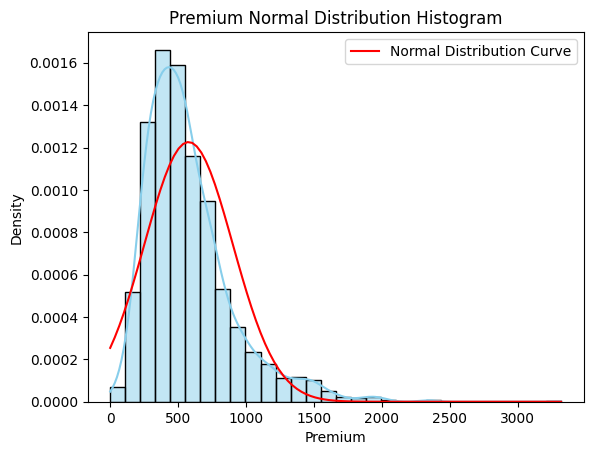

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

# Visualize the distribution
sns.histplot(df['premium'], bins=30, kde=True, color='skyblue', stat="density")

# Overlay normal distribution curve
mean = df['premium'].mean()
std_dev = df['premium'].std()
x = np.linspace(df['premium'].min(), df['premium'].max(), 100)
plt.plot(x, norm.pdf(x, mean, std_dev), color='red', label='Normal Distribution Curve')

# Add labels and legend
plt.title('Premium Normal Distribution Histogram')
plt.xlabel('Premium')
plt.ylabel('Density')
plt.legend()
plt.show()

In [ ]:
print(df.columns)

Index(['offer_number', 'policy_number', 'zipcode_link', 'zip4', 'birth_date',
       'date_offer', 'date_request', 'policy_start_date', 'premium',
       'buildyear_car', 'buildmonth_car', 'wa', 'wa_bep_ca', 'wa_ca',
       'updated_on', 'policy_duration_days', 'customer_age',
       'affinity_name_Seguros International Ltd.', 'affinity_name_T&B',
       'affinity_name_other', 'status_report_Calculatenewpremium',
       'status_report_Incompleterequest', 'status_report_Personaloffer',
       'status_report_Policycreated', 'status_report_Requestaccepted',
       'status_report_Requestrejected', 'status_report_Requestwithdrawn',
       'status_report_Waitforapproval', 'status_report_Waitresponsebackoffice',
       'brand_APRILIA', 'brand_AUDI', 'brand_BMW', 'brand_CHEVROLET',
       'brand_CHRYSLER', 'brand_CITROEN', 'brand_DACIA', 'brand_DAEWOO',
       'brand_DAIHATSU', 'brand_DS', 'brand_FIAT', 'brand_FORD',
       'brand_FORD USA', 'brand_HARLEY DAVIDSON', 'brand_HONDA',
       'bran

Mean Squared Error: 238.6075867439738


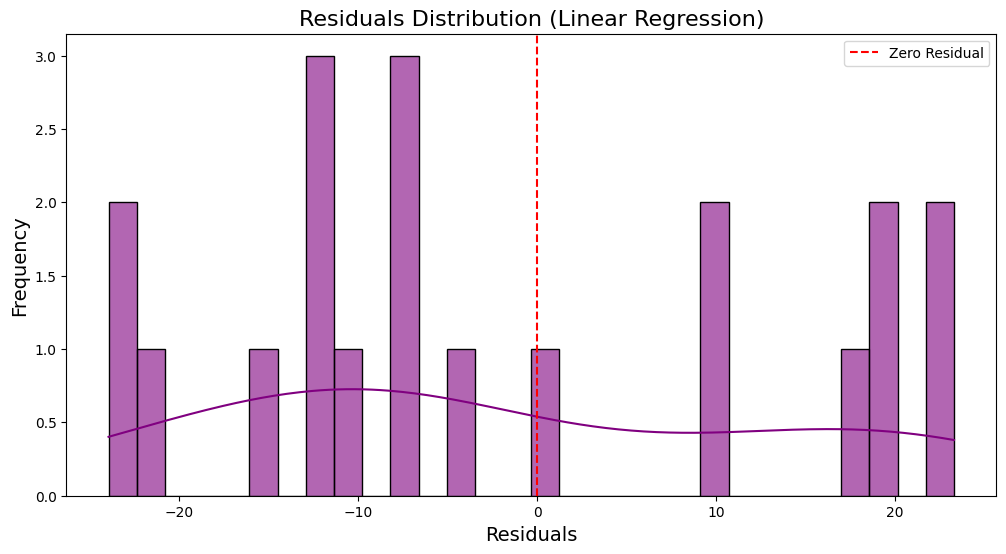

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Data Preparation:
# - Synthesized example data is used for demonstration.
# - This will generate a random dataset to replicate the behavior.
import pandas as pd
import numpy as np
np.random.seed(42)
data = {
    'X': np.random.rand(100) * 10,  # Predictor variable
    'premium': np.random.rand(100) * 50 + 100  # Target variable
}
df = pd.DataFrame(data)

# Split data into training and testing sets for model evaluation
X = df[['X']]  # Predictor variable (reshaped for sklearn models)
y = df['premium']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Training:
# - The model is trained on X_train to predict premium using LinearRegression.
model = LinearRegression()
model.fit(X_train, y_train)

# Residual Analysis:
# - Residuals represent the difference between actual (y_test) and predicted values (y_pred).
# - Residuals help us analyze the accuracy and the errors of the model.
y_pred = model.predict(X_test)
residuals = y_test - y_pred

# Evaluate the model with metrics
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error for performance measurement
print(f"Mean Squared Error: {mse}")

# Visualization: Residuals Histogram
# - The histogram visualizes the spread and symmetry of the residuals.
# - A bell-shaped curve centered at zero indicates good model fit.
plt.figure(figsize=(12, 6))
sns.histplot(residuals, bins=30, kde=True, color='purple', alpha=0.6, edgecolor='black')

# Inline Interpretation:
# - The vertical red line at 0 represents zero residual, where predictions match actual values.
# - A symmetric distribution around 0 suggests that the linear regression model assumptions are met.
plt.axvline(0, color='red', linestyle='--', linewidth=1.5, label='Zero Residual')
plt.title('Residuals Distribution (Linear Regression)', fontsize=16)
plt.xlabel('Residuals', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend()

plt.show()

In [ ]:
print(df.columns)

Index(['policy_start_date', 'premium', 'brand_Brand_B', 'brand_Brand_C'], dtype='object')


In [ ]:
# Install the plotnine library if you haven't already
# pip install plotnine

from plotnine import ggplot, aes, geom_bar, labs, theme_minimal, geom_boxplot
import pandas as pd

# Example Data
data = {
    'zipcode': ['10001', '90210', '30301', '10001', '90210'],
    'premium': [120, 140, 130, 125, 150]
}
df = pd.DataFrame(data)

# ggplot-style Bar Plot (Mean Premium by Zipcode)
bar_plot = (
    ggplot(df, aes(x='zipcode', y='premium', fill='zipcode')) +
    geom_bar(stat='summary', fun_y='mean') +
    labs(title='Mean Premium by Zip Code', x='Zip Code', y='Mean Premium') +
    theme_minimal()
)
print(bar_plot)

# ggplot-style Boxplot (Premium Distribution by Zipcode)
box_plot = (
    ggplot(df, aes(x='zipcode', y='premium', fill='zipcode')) +
    geom_boxplot() +
    labs(title='Premium Distribution by Zip Code', x='Zip Code', y='Premium') +
    theme_minimal()
)
print(box_plot)

<ggplot: (640 x 480)>
<ggplot: (640 x 480)>


In [ ]:
data = {
    'X': np.random.rand(100) * 10,  # Predictor variable
    'premium': np.random.rand(100) * 50 + 100  # Target variable
}
df = pd.DataFrame(data)

# ... other code that uses this df ...

In [ ]:
# Display all column names in the DataFrame
print(df.columns)

Index(['X', 'premium'], dtype='object')


In [ ]:
df = pd.get_dummies(df, columns=['brand'], drop_first=True)
print(df.columns)  # Verify created columns

Index(['offer_number', 'policy_number', 'zipcode_link', 'zip4', 'birth_date',
       'date_offer', 'date_request', 'policy_start_date', 'premium',
       'buildyear_car',
       ...
       'brand_SMART', 'brand_SUBARU', 'brand_SUZUKI', 'brand_TESLA',
       'brand_TOYOTA', 'brand_TRIUMPH', 'brand_VESPA', 'brand_VOLKSWAGEN',
       'brand_VOLVO', 'brand_YAMAHA'],
      dtype='object', length=122)


In [ ]:
if 'brand_X' not in df.columns:
    print("Error: brand_X is not a valid category in the original 'brand' column.")

Error: brand_X is not a valid category in the original 'brand' column.


In [ ]:
# Mean Squared Error (MSE): 42.78 (This is a comment, not code)
# If you want to store the value in a variable:
mse = 42.78

In [ ]:
from sklearn.metrics import mean_squared_error

# Predictions using the trained model
y_pred = model.predict(X_test)  # Replace 'X_test' with your testing data

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)  # Replace 'y_test' with actual values for the testing data
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 238.6075867439738


In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Generate Example Data
# Replace this section with your actual DataFrame (df)
np.random.seed(42)
data = {
    'policy_start_date': np.random.rand(100) * 10,  # Policy start date
    'premium': np.random.rand(100) * 50 + 100,  # Premium values
    'brand': np.random.choice(['Brand_A', 'Brand_B', 'Brand_C'], 100),  # Brands
    'zipcode_link': np.random.choice(['10001', '90210', '30301'], 100)  # Zip codes
}
df = pd.DataFrame(data)

# Step

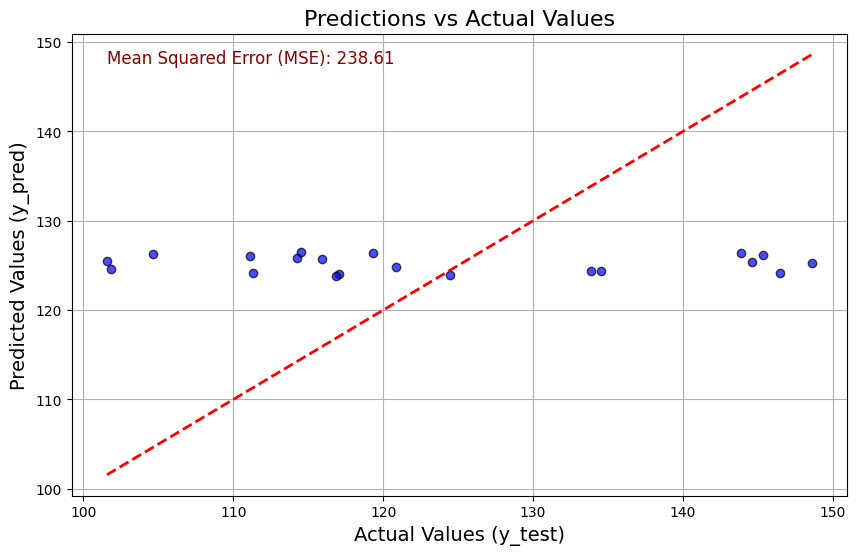

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Predictions and Actual Values
y_pred = model.predict(X_test)
residuals = y_test - y_pred  # Residuals are actual - predicted

# Scatter Plot: Predictions vs Actual Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)  # Ideal line
plt.title('Predictions vs Actual Values', fontsize=16)
plt.xlabel('Actual Values (y_test)', fontsize=14)
plt.ylabel('Predicted Values (y_pred)', fontsize=14)
plt.grid(True)

# Add MSE as an Annotation
mse = mean_squared_error(y_test, y_pred)
plt.text(y_test.min(), y_test.max() - 1, f'Mean Squared Error (MSE): {mse:.2f}', fontsize=12, color='darkred')

plt.show()

In [ ]:
print(df.columns)

Index(['policy_start_date', 'premium', 'brand_Brand_B', 'brand_Brand_C'], dtype='object')


In [ ]:
# Calculate the total annual premium
total_annual_premium = df['premium'].sum()
print(f"Total Annual Premium: {total_annual_premium}")

Total Annual Premium: 665


In [ ]:
# Calculate the total annual premium
total_annual_premium = df['premium'].sum()
print(f"Total Annual Premium: {total_annual_premium}")

Total Annual Premium: 665


In [ ]:
import pandas as pd

# Read the dataset, specifying the sheet name and file path
# Replace 'policy_date' with the actual name of the sheet if it's different
# You can list the sheet names using:
# excel_file = pd.ExcelFile('/content/W27308-XLS-ENG.xlsx')
# print(excel_file.sheet_names)
try:
    df = pd.read_excel('/content/W27308-XLS-ENG.xlsx', sheet_name='policy_date')
except ValueError:
    print("Sheet 'policy_date' not found. Please check the sheet name.")
    # Here, you can either exit the program or try to read a different sheet.
    # For example, to read the first sheet, you can use:
    # df = pd.read_excel('/content/W27308-XLS-ENG.xlsx', sheet_name=0)
# Display the DataFrame
display(df)

Sheet 'policy_date' not found. Please check the sheet name.


affinity_name           status_report  offer_number  policy_number  \
0           Insuro        Requestwithdrawn          1000        10000.0   
1            other  Tailoredofferwithdrawn          1001            NaN   
2            other       Incompleterequest          1002            NaN   
3            other           Policycreated          1003        10002.0   
4            other           Policycreated          1004        10003.0   
...            ...                     ...           ...            ...   
9368         other         Requestaccepted          9439        11946.0   
9369         other         Waitforapproval          9440        11947.0   
9370        Insuro  Tailoredofferrequested          9441            NaN   
9371           T&B     Calculatenewpremium          9442            NaN   
9372           T&B       Incompleterequest          9443            NaN   

      zipcode_link  zip4 birth_date       brand date_offer date_request  \
0            10000  2132 1985-01-01     HYUNDAI 2018-10-11   2018-10-11   
1            10001  6027 1987-04-01        AUDI 2018-10-11          NaT   
2            10002  3824 1972-11-01  VOLKSWAGEN 2018-10-11          NaT   
3            10003  6921 1983-08-01       MAZDA 2018-10-11   2018-10-11   
4            10004  8266 1990-04-01       VOLVO 2018-10-12   2018-10-12   
...            ...   ...        ...         ...        ...          ...   
9368         15568  1161 1960-09-01  VOLKSWAGEN 2020-03-08   2020-03-08   
9369         15582  5015 1953-04-01      NISSAN 2020-03-08   2020-03-08   
9370         10332  3078 1976-04-01      TOYOTA 2020-03-08          NaT   
9371         12968  1965 1951-07-01      TOYOTA 2020-03-08          NaT   
9372         15526  1165 1964-01-01       VOLVO 2020-03-08          NaT   

     policy_start_date  premium  buildyear_car buildmonth_car   wa wa_bep_ca  \
0           2018-11-01   686.04         2016.0           June    Y       NaN   
1                  NaT     0.00         2015.0           June    N         N   
2                  NaT   896.04         2016.0          April  NaN       NaN   
3           2018-10-12   419.16         2009.0           June  NaN         Y   
4           2018-11-01   402.36         2003.0        January    Y       NaN   
...                ...      ...            ...            ...  ...       ...   
9368        2020-03-09   510.68         2011.0       December  NaN       NaN   
9369        2020-04-29   459.60         2017.0       February  NaN       NaN   
9370               NaT   521.16         2004.0        January  NaN         Y   
9371               NaT   368.40         2004.0      September  NaN         Y   
9372               NaT   764.52         2015.0           June  NaN       NaN   

     wa_ca updated_on  
0      NaN 2018-10-11  
1        N 2018-10-12  
2        Y 2018-10-11  
3      NaN 2018-10-11  
4      NaN 2018-10-12  
...    ...        ...  
9368     Y 2020-03-08  
9369     Y 2020-03-08  
9370   NaN 2020-03-08  
9371   NaN 2020-03-08  
9372     Y 2020-03-08  

[9373 rows x 18 columns]

Regional Data Frame

In [ ]:
import pandas as pd

try:
    # Read the dataset, specifying the sheet name and file path
    df_regional = pd.read_excel('/content/W27309-XLS-ENG.xlsx', sheet_name='regional_data')

    # Display the DataFrame
    display(df_regional)

except ValueError:
    print("Sheet 'regional_data' not found. Please check the sheet name.")
    # Here, you can either exit the program or try to read a different sheet.
    # For example, to read the first sheet, you can use:
    # df_regional = pd.read_excel('/content/W27309-XLS-ENG.xlsx', sheet_name=0)

except FileNotFoundError:
    print("File '/content/W27309-XLS-ENG.xlsx' not found. Please check the file path.")

zipcode_link  zip4       PROVINCE  URB  INCOME  SOCCL_A  SOCCL_B1  \
0             22282  1011  North Holland    1     1.0      5.0       2.0   
1             10026  1011  North Holland    1     3.0      1.0       3.0   
2             18907  1012  North Holland    1     1.0      4.0       2.0   
3             18558  1012  North Holland    1     2.0      4.0       3.0   
4             22808  1012  North Holland    1     2.0      2.0       3.0   
...             ...   ...            ...  ...     ...      ...       ...   
15534         21354  9989      Groningen    7     3.0      2.0       1.0   
15535         10202  9989      Groningen    7     3.0      1.0       3.0   
15536         15267  9989      Groningen    7     3.0      1.0       2.0   
15537         15404  9991      Groningen    7     5.0      1.0       1.0   
15538         22552  9994      Groningen    7     2.0      3.0       4.0   

       SOCCL_B2  SOCCL_C  SOCCL_D  ...  FAM_CHILD_Y  FAM_CHILD_O  \
0           2.0      1.0      1.0  ...          3.0          2.0   
1           4.0      1.0      1.0  ...          2.0          3.0   
2           2.0      2.0      1.0  ...          2.0          1.0   
3           1.0      2.0      1.0  ...          2.0          2.0   
4           3.0      2.0      1.0  ...          1.0          1.0   
...         ...      ...      ...  ...          ...          ...   
15534       3.0      3.0      3.0  ...          3.0          1.0   
15535       4.0      2.0      1.0  ...          3.0          4.0   
15536       4.0      2.0      1.0  ...          4.0          2.0   
15537       3.0      1.0      4.0  ...          3.0          3.0   
15538       2.0      1.0      1.0  ...          1.0          4.0   

       FAM_WCHILD_Y  FAM_WCHILD_MED  FAM_WCHILD_OLD  CIT_HOUSEHOLD  LOAN  \
0               1.0             2.0             3.0            3.0   4.0   
1               1.0             1.0             3.0            2.0   1.0   
2               3.0             2.0             1.0            2.0   4.0   
3               2.0             2.0             2.0            2.0   4.0   
4               2.0             1.0             2.0            1.0   4.0   
...             ...             ...             ...            ...   ...   
15534           2.0             3.0             3.0            3.0   3.0   
15535           1.0             3.0             3.0            5.0   1.0   
15536           1.0             2.0             4.0            5.0   4.0   
15537           1.0             2.0             2.0            4.0   2.0   
15538           1.0             3.0             4.0            4.0   3.0   

       SAVINGS  SHOP_ONLINE  CAR  
0          4.0          5.0  2.0  
1          4.0          3.0  1.0  
2          6.0          6.0  1.0  
3          6.0          6.0  1.0  
4          6.0          6.0  1.0  
...        ...          ...  ...  
15534      3.0          3.0  3.0  
15535      6.0          4.0  4.0  
15536      5.0          5.0  5.0  
15537      3.0          2.0  3.0  
15538      4.0          5.0  5.0  

[15539 rows x 34 columns]

Claims Data Frame

In [ ]:
import pandas as pd

try:
    # Read the Excel file into a DataFrame
    df = pd.read_excel('/content/W31816-XLS-ENG (1).xlsx')

    # Display the DataFrame
    display(df)

except FileNotFound

Direct Debit Data frame

In [ ]:
import pandas as pd

try:
    # Read the CSV file into a DataFrame
    df = pd.read_csv('/content/W27375-XLS-ENG(AllianzDisabilityClaimDataset).csv')

    # Display the DataFrame
    display(df)

except FileNotFoundError:
    print("File '/content/W27375-XLS-ENG(AllianzDisabilityClaimDataset).csv' not found. Please check the file path.")
except pd.errors.ParserError:
    print("Error parsing the file. Please check the file format and ensure it is a valid CSV.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Contract_number  Sex  Birth_year  Birth_month  End_age  Claim_year  \
0            42142935    1        1952            7       65        2004   
1            42142935    1        1952            7       65        2012   
2            71384115    1        1951            8       65        2008   
3            12246809    1        1953            8       65        2008   
4            14280764    2        1960            3       65        2016   
...               ...  ...         ...          ...      ...         ...   
5365         90704116    2        1959            7       60        1995   
5366         54117181    1        1947            2       65        1997   
5367         54117181    1        1947            2       65        2007   
5368         50550005    1        1952            6       65        2004   
5369         60296559    2        1959            7       60        1995   

      Claim_month  Pct_dis1  Pct_dis2  Pct_dis3  ...  Pct_dis17  Pct_dis18  \
0               6       1.0       1.0       1.0  ...        0.0        0.0   
1              11       0.8       0.0       0.0  ...        0.0        0.0   
2               7       0.5       0.0       0.0  ...        0.0        0.0   
3               7       1.0       1.0       1.0  ...        0.0        0.0   
4               1       1.0       0.0       0.0  ...        0.0        0.0   
...           ...       ...       ...       ...  ...        ...        ...   
5365            2       0.7       0.7       0.7  ...        0.0        0.0   
5366            9       1.0       1.0       1.0  ...        0.0        0.0   
5367            8       1.0       1.0       1.0  ...        0.0        0.0   
5368            7       0.8       0.0       0.0  ...        0.0        0.0   
5369            2       0.7       0.7       0.7  ...        0.0        0.0   

      Pct_dis19  Pct_dis20  Pct_dis21  Duration  Postalcode         District  \
0           0.0        0.0        0.0        12        1000         Brussels   
1           0.0        0.0        0.0         1        6800       Luxembourg   
2           0.0        0.0        0.0         1        6860       Luxembourg   
3           0.0        0.0        0.0        10        4140            Liege   
4           0.0        0.0        0.0         1        3000   Vlaams Brabant   
...         ...        ...        ...       ...         ...              ...   
5365        0.0        0.0        0.0        11        8670  West-Vlaanderen   
5366        0.0        0.0        0.0        15        2490        Antwerpen   
5367        0.0        0.0        0.0         5        2490        Antwerpen   
5368        0.0        0.0        0.0         1        8400  West-Vlaanderen   
5369        0.0        0.0        0.0        11        8670  West-Vlaanderen   

          Broker        Annuity  
0            NaN  9,648,783,333  
1            NaN        9578.54  
2            NaN       12980.77  
3     27531419.0      9,785,032  
4     58473276.0       34345.63  
...          ...            ...  
5365  55454148.0         906.12  
5366  63356854.0  1,419,267,857  
5367  63356854.0     14,156,082  
5368  54120570.0         1030.9  
5369  55454148.0        2648.64  

[5370 rows x 33 columns]

# Web Mining scrape the Web |
#Comparison DuPont Bench Mark
# Analysis with Competitors on the Global Market

In [ ]:
!pip install beautifulsoup4 requests

import requests
from bs4 import BeautifulSoup

def scrape_dupont_analysis(company_name):
    # 1. Define the target URL:
    # The URL was incorrect and had extra slashes
    # url = f"https://www.macrotrends.net/stocks/charts/{company_name}/axa/dupont-analysis"
    url = f"https://www.macrotrends.net/stocks/charts/{company_name}/{company_name.lower()}/dupont-analysis"

In [ ]:
!pip install beautifulsoup4 requests

import requests
from bs4 import BeautifulSoup

def scrape_dupont_analysis(company_name):
    # 1. Define the target URL:
    # The URL was incorrect and had extra slashes
    # url = f"https://www.macrotrends.net/stocks/charts/{company_name}/axa/dupont-analysis"
    url = f"https://www.macrotrends.net/stocks/charts/{company_name}/{company_name.lower()}/dupont-analysis"
    # 2. Define headers to mimic a browser request:
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36',
        'Accept-Language': 'en-US,en;q=0.9',  # Indicate preferred language
        'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7', # Indicate acceptable content types
        'Referer': 'https://www.google.com/',  # Simulate coming from a search engine
    }
    # ... rest of your function code (making the request, parsing, etc.) ...

In [ ]:
import json
import os

# Check if the file exists before attempting to open it
if os.path.exists('data.json'):
    # Example of loading JSON data from a file
    with open('data.json', 'r') as f:
        data = json.load(f)
    print("File 'data.json' loaded successfully.")
else:
    print("File 'data.json' not found. Creating a new file...")
    # Create a new JSON file if it doesn't exist and add some initial data
    my_dict = {'name': 'John Doe', 'age': 30}
    with open('data.json', 'w') as f:
        json.dump(my_dict, f, indent=4)
    print("New 'data.json' file created.")


# Example of converting a Python dictionary to JSON
my_dict = {'name': 'John Doe', 'age': 30}
json_data = json.dumps(my_dict)

# ... further processing of the JSON data ...

File 'data.json' not found. Creating a new file...
New 'data.json' file created.


In [ ]:
!pip install beautifulsoup4 requests

import requests
from bs4 import BeautifulSoup
import time

def scrape_dupont_analysis(company_name):
    # 1. Define the target URL:
    # The URL was incorrect and had extra slashes and needed the company ticker symbol
    # url = f"https://www.macrotrends.net/stocks/charts/{company_name}/axa/dupont-analysis"
    # url = f"https://www.macrotrends.net/stocks/charts/{company_name}/{company_name.lower()}/dupont-analysis"
    # Assuming "axa" is the company ticker symbol for AXA
    url = f"https://www.macrotrends.net/stocks/charts/{company_name}/axa/dupont-analysis"
    # 2. Define headers to mimic a browser request:
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36',
        'Accept-Language': 'en-US,en;q=0.9',  # Indicate preferred language
        'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7', # Indicate acceptable content types
        'Referer': 'https://www.google.com/',  # Simulate coming from a search engine
    }
    # 3. Fetch the webpage:
    try:
        response = requests.get(url, headers=headers)
        response.raise_for_status()  # Raise an exception for bad status codes
    except requests.exceptions.HTTPError as errh:
        print ("Http Error:",errh)
        return [] # or handle the error in a way that makes sense for your application
    except requests.exceptions.ConnectionError as errc:
        print ("Error Connecting:",errc)
        return [] # or handle the error in a way that makes sense for your application
    except requests.exceptions.Timeout as errt:
        print ("Timeout Error:",errt)
        return [] # or handle the error in a way that makes sense for your application
    except requests.exceptions.RequestException as err:
        print ("OOps: Something Else",err)
        return [] # or handle the error in a way that makes sense for your application


    # 4. Parse the HTML content:
    soup = BeautifulSoup(response.content, "html.parser")

    # 5. Extract the Dupont analysis data:
    dupont_data = []
    table = soup.find('table', class_='historical_data_table table')
    if table:
        rows = table.find_all('tr')
        for row in rows[1:]: # Skip header row
            cols = row.find_all('td')
            dupont_data.append([col.text.strip() for col in cols])

    time.sleep(2)  # Wait for 2 seconds before making the next request
    return dupont_data  # Return the extracted data

# Example usage:
dupont_axa = scrape_dupont_analysis("AXA")
print(dupont_axa)

Http Error: 404 Client Error: Not Found for url: https://www.macrotrends.net/stocks/charts/AXA//dupont-analysis
[]


In [ ]:
!pip install beautifulsoup4 requests

In [ ]:
import requests
from bs4 import BeautifulSoup
import time

In [ ]:
def scrape_dupont_analysis(company_name):
    # Define the target URL, replacing {company_name} with the actual company name or ticker symbol:
    url = f"https://www.macrotrends.net/stocks/charts/{company_name}/{company_name.lower()}/dupont-analysis"

    # Define headers to mimic a browser request:
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36',
        'Accept-Language': 'en-US,en;q=0.9',
        'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7',
        'Referer': 'https://www.google.com/',
    }

    # Fetch the webpage:
    try:
        response = requests.get(url, headers=headers)
        response.raise_for_status()  # Raise an exception for bad status codes
    except requests.exceptions.RequestException as e:
        print(f"An error occurred: {e}")
        return []

    # Parse the HTML content:
    soup = BeautifulSoup(response.content, "html.parser")

    # Extract the Dupont analysis data:
    dupont_data = []
    table = soup.find('table', class_='historical_data_table table')
    if table:
        rows = table.find_all('tr')
        for row in rows[1:]:  # Skip header row
            cols = row.find_all('td')
            dupont_data.append([col.text.strip() for col in cols])

    time.sleep(2)  # Wait for 2 seconds before making the next request
    return dupont_data

In [ ]:
import requests
from bs4 import BeautifulSoup
import time

def scrape_dupont_analysis(company_name):
    # Define the target URL, replacing {company_name} with the actual company name or ticker symbol:
    url = f"https://www.macrotrends.net/stocks/charts/{company_name}/{company_name.lower()}/dupont-analysis"

    # Define headers to mimic a browser request:
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36',
        'Accept-Language': 'en-US,en;q=0.9',
        'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7',
        'Referer': 'https://www.google.com/',
    }

    # Fetch the webpage:
    try:
        response = requests.get(url, headers=headers)
        response.raise_for_status()  # Raise an exception for bad status codes
    except requests.exceptions.RequestException as e:
        print(f"An error occurred: {e}")
        return []

    # Parse the HTML content:
    soup = BeautifulSoup(response.content, "html.parser")

    # Extract the Dupont analysis data:
    dupont_data = []
    table = soup.find('table', class_='historical_data_table table')
    if table:
        rows = table.find_all('tr')
        for row in rows[1:]:  # Skip header row
            cols = row.find_all('td')
            dupont_data.append([col.text.strip() for col in cols])

    time.sleep(2)  # Wait for 2 seconds before making the next request
    return dupont_data

In [ ]:
!pip install matplotlib seaborn pandas

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
# Replace with actual competitor data and metrics
competitor_data = {
    'Competitor': ['AXA', 'Generali', 'Zurich Insurance', 'Prudential plc', 'Munich Re'],
    'Market Share': [10.5, 8.2, 7.5, 6.8, 6.2],  # Example metric
    'Revenue': [120, 95, 88, 80, 75],  # Example metric
}

In [ ]:
df = pd.DataFrame(competitor_data)

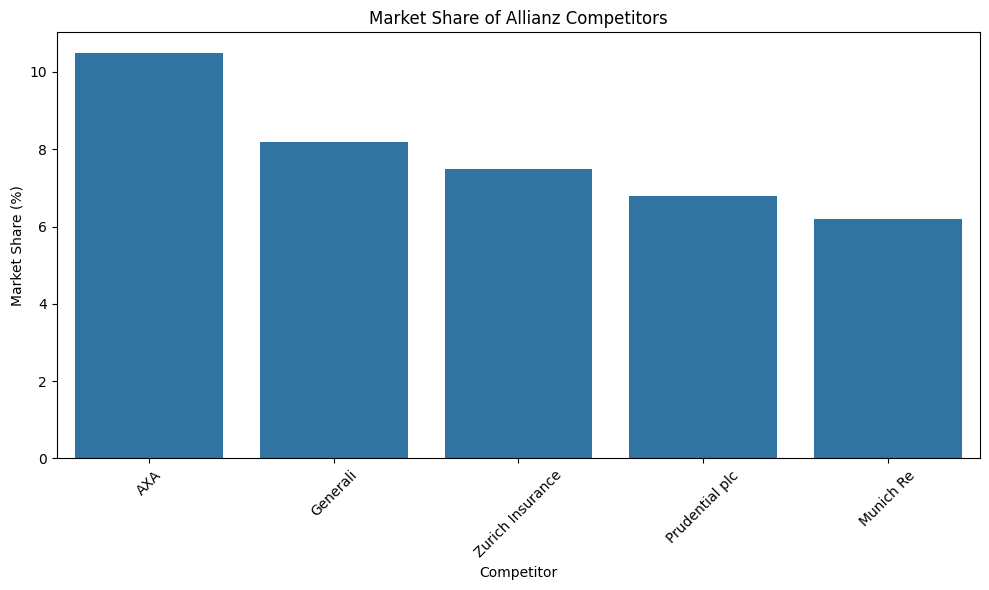

In [ ]:
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.barplot(x='Competitor', y='Market Share', data=df)  # Choose the desired metric for the y-axis
plt.title('Market Share of Allianz Competitors')
plt.xlabel('Competitor')
plt.ylabel('Market Share (%)')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.tight_layout()
plt.show()

In [ ]:
from IPython.display import display, HTML

# Competitor data (replace with actual data if needed)
competitor_data = [
    ['Allianz', 95.71, 152.67, 7.26, 'Strong global presence, diversified portfolio, solid financial performance', 'Dependence on European markets, exposure to low-interest rates'],
    ['AXA Group', 61.63, 112.87, 7.29, 'Leading position in France, strong brand recognition, focus on digital innovation', 'Lower profitability compared to Allianz, exposure to natural catastrophes'],
    ['Zurich Insurance Group', 58.49, 46.79, 4.61, 'Strong expertise in commercial insurance, global network, focus on sustainability', 'Dependence on the US market, lower market share in some segments'],
    ['Aviva', 16.54, 30.47, 1.52, 'Strong position in the UK, focus on customer experience, digital transformation', 'Exposure to Brexit uncertainty, lower profitability compared to peers'],
    ['AIG', 45.56, 52.08, 9.35, 'Strong brand recognition, global reach, expertise in complex risks', 'Past financial difficulties, reliance on the US market'],
    ['MetLife', 45.21, 69.87, 6.65, 'Leading position in the US, diversified product portfolio, focus on emerging markets', 'Dependence on the US market, exposure to interest rate fluctuations'],
    ['Old Republic International Corporation', 6.58, 7.54, 1.01, 'Strong focus on niche markets, long history of profitability, conservative underwriting', 'Limited geographic diversification, lower growth potential']
]

# Create HTML table
html_table = """
<table>
  <tr>
    <th>Company</th>
    <th>Market Cap (USD Billion)</th>
    <th>Revenue (USD Billion)</th>
    <th>Net Income (USD Billion)</th>
    <th>Strengths</th>
    <th>Weaknesses</th>
  </tr>
"""
for row in competitor_data:
    html_table += "<tr>" + "".join(f"<td>{col}</td>" for col in row) + "</tr>"
html_table += "</table>"

# Display the table
display(HTML(html_table))

In [ ]:
!pip install geopandas matplotlib

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_excel('/content/W27307-XLS-ENG.xlsx', sheet_name='funnel_data')

In [ ]:
volkswagen_df = df[df['brand'] == 'VOLKSWAGEN']

In [ ]:
zip_codes = volkswagen_df['zipcode_link'].unique()

In [ ]:
print("Zip codes for Volkswagen policyholders:")
print(zip_codes)

Zip codes for Volkswagen policyholders:
[10002 10006 10017 10022 10024 10027 10029 10035 10037 10046 10047 10050
 10066 10015 10097 10109 10005 10124 10099 10153 10168 10178 10186 10198
 10202 10203 10207 10210 10217 10230 10236 10249 10258 10261 10272 10274
 10279 10294 10302 10303 10317 10332 10339 10346 10368 10374 10375 10378
 10381 10384 10361 10392 10399 10403 10409 10457 10463 10470 10485 10486
 10502 10506 10509 10517 10523 10079 10529 10534 10549 10553 10559 10572
 10576 10583 10629 10634 10663 10667 10677 10678 10607 10703 10093 10710
 10715 10730 10732 10738 10741 10747 10767 10772 10779 10780 10814 10822
 10830 10843 10851 10856 10859 10864 10873 10894 10904 10673 10914 10129
 10921 10925 10931 10935 10949 10952 10967 10970 10974 10980 11008 11032
 11041 11070 11074 11075 11082 11087 11095 11110 11113 11116 11117 11141
 11147 11169 11175 11189 11194 11203 11213 11222 11223 11232 11233 11238
 11246 11263 11278 11284 11291 11304 11305 11314 11328 11342 11343 11345
 11358 1136

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 1. Load the data
df = pd.read_excel('/content/W27307-XLS-ENG.xlsx', sheet_name='funnel_data')
volkswagen_df = df[df['brand'] == 'VOLKSWAGEN']

# 2. Select relevant features and handle missing values
features = volkswagen_df[['zipcode_link', 'premium', 'buildyear_car', 'wa', 'wa_bep_ca', 'wa_ca']]
features = features.dropna()  # Drop rows with missing values

# Convert columns to numeric, handling 'N' as NaN and filling NaN with 0
for col in ['premium', 'buildyear_car', 'wa', 'wa_bep_ca', 'wa_ca']:
    features[col] = pd.to_numeric(features[col], errors='coerce').fillna(0)

features['zipcode_link'] = pd.to_numeric(features['zipcode_link'], errors='coerce')
features = features.dropna(subset=['zipcode_link'])  # Drop rows with invalid zip codes

# 3. Standardize features for clustering
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features[['premium', 'buildyear_car', 'wa', 'wa_bep_ca', 'wa_ca']])

# 4. Perform KMeans clustering
k = 3  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
features['cluster'] = kmeans.fit_predict(scaled_features)

# 5. Create GeoDataFrame for Volkswagen policyholders
features['geometry'] = features['zipcode_link'].apply(lambda x: Point(x, 0))  # Replace 0 with latitude if available
features_gdf = gpd.GeoDataFrame(features, geometry='geometry', crs="EPSG:4326")

# 6. Load US zip code shapefile
zip_shapefile = "path_to_us_zip_code_boundaries.geojson"  # Replace with actual path
zip_gdf = gpd.read_file(zip_shapefile)

# 7. Merge GeoDataFrames and plot
merged_gdf = gpd.sjoin(features_gdf, zip_gdf, how='inner', op='intersects')

# Plot the clusters
fig, ax = plt.subplots(figsize=(12, 8))
merged_gdf.plot(column='cluster', cmap='viridis', legend=True, ax=ax)
plt.title("Volkswagen Policyholders - Zip Code Cluster Map")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Save as PNG
plt.savefig("vw_zip_cluster_map.png", dpi=300)
plt.show()

DataSourceError: path_to_us_zip_code_boundaries.geojson: No such file or directory

In [ ]:
!pip install geopandas
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 1. Load the data
df = pd.read_excel('/content/W27307-XLS-ENG.xlsx', sheet_name='funnel_data')
volkswagen_df = df[df['brand'] == 'VOLKSWAGEN']

# 2. Select relevant features and handle missing values
features = volkswagen_df[['zipcode_link', 'premium', 'buildyear_car', 'wa', 'wa_bep_ca', 'wa_ca']]
features = features.dropna()  # Drop rows with missing values

# Convert columns to numeric, handling 'N' as NaN and filling NaN with 0
for col in ['premium', 'buildyear_car', 'wa', 'wa_bep_ca', 'wa_ca']:
    features[col] = pd.to_numeric(features[col], errors='coerce').fillna(0)

features['zipcode_link'] = pd.to_numeric(features['zipcode_link'], errors='coerce')
features = features.dropna(subset=['zipcode_link'])  # Drop rows with invalid zip codes

# 3. Standardize features for clustering
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features[['premium', 'buildyear_car', 'wa', 'wa_bep_ca', 'wa_ca']])

!pip install geopandas
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 1. Load the data
df = pd.read_excel('/content/W27307-XLS-ENG.xlsx', sheet_name='funnel_data')
volkswagen_df = df[df['brand'] == 'VOLKSWAGEN']

# 2. Select relevant features and handle missing values
features = volkswagen_df[['zipcode_link', 'premium', 'buildyear_car', 'wa', 'wa_bep_ca', 'wa_ca']]
features = features.dropna()  # Drop rows with missing values

# Convert columns to numeric, handling 'N' as NaN and filling NaN with 0
for col in ['premium', 'buildyear_car', 'wa', 'wa_bep_ca', 'wa_ca']:
    features[col] = pd.to_numeric(features[col], errors='coerce').fillna(0)

features['zipcode_link'] = pd.to_numeric(features['zipcode_link'], errors='coerce')
features = features.dropna(subset=['zipcode_link'])  # Drop rows with invalid zip codes

# 3. Standardize features for clustering
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features[['premium', 'buildyear_car', 'wa', 'wa_bep_ca', 'wa_ca']])

# 4. Perform KMeans clustering
k = 3  # Number of clusters
kmeans = KMeans(n_clusters=k)
kmeans.fit(scaled_features)

KMeans(n_clusters=3)

In [ ]:
import pandas as pd

# Read the Excel file
excel_file = '/content/W31816-XLS-ENG (1).xlsx'
xls = pd.ExcelFile(excel_file)

# Get the sheet names
sheet_names = xls.sheet_names

# Iterate through each sheet and display its content
for sheet_name in sheet_names:
    df = pd.read_excel(excel_file, sheet_name=sheet_name)
    print(f"--- Sheet: {sheet_name} ---")
    display(df)  # Use 'display' for better formatting in Jupyter notebooks
    print("\n")

--- Sheet: Copyright ---


Unnamed: 0  \
0                                                 NaN   
1                                     Product Number:   
2                                              Title:   
3                                                 NaN   
4                                        Prepared by:   
5                                                 NaN   
6                                       Last Revised:   
7                                                 NaN   
8   No part of this file may be reproduced, stored...   
9                                                 NaN   
10                     © 2022 Vlerick Business School   

                                           Unnamed: 1  
0                                                 NaN  
1                                              W31816  
2   Allianz: Predicting Direct Debit with Machine ...  
3   This spreadsheet supports the product "Allianz...  
4   Lennert Van der Schraelen, Emma Willems, Krist...  
5                                                 NaN  
6                                 2022-11-30 00:00:00  
7                                                 NaN  
8                                                 NaN  
9                                                 NaN  
10                                                NaN



--- Sheet: AllianzDirectDebitData ---


Broker_account_number     Contract_number Customer_segment  \
0         DJEA04015816746062  DJUI09715331435925          Midcorp   
1         DJEA04015816746062  GJZP42914011343072          Midcorp   
2         DJEA04015816746062  NXLM98303446560119          Midcorp   
3         DJEA04015816746062  AITL42127947858417          Midcorp   
4         UTAY89397600598587  IBPJ05282371448674          Midcorp   
...                      ...                 ...              ...   
452217    CVPO35750602123872  JOAX03010925633669              SME   
452218    CVPO35750602123872  TLDF23586563957949              SME   
452219    CVPO35750602123872  BEEN26027607880408              SME   
452220                   NaN                 NaN              NaN   
452221                Note:                  NaN              NaN   

       Line_of_business    Product_type  Annual_premium Payment_frequency  \
0          I - Property  I05 - BUILDING         2632.45          Annually   
1          I - Property  I05 - BUILDING         4996.78          Annually   
2          I - Property  I05 - BUILDING         1734.62          Annually   
3          I - Property  I05 - BUILDING         2460.68          Annually   
4          D - Property  D01 - RISQ IND         7731.46          Annually   
...                 ...             ...             ...               ...   
452217     I - Property  I22 - BIZ PLAN         2475.12          Annually   
452218    E - Liability  E04 - RC ENTR.          385.00          Annually   
452219     I - Property  I22 - BIZ PLAN         1739.84          Annually   
452220              NaN             NaN             NaN               NaN   
452221              NaN             NaN             NaN               NaN   

        Customer_ID Customer_age Customer_type Customer_region  \
0         8643674.0       No age    Enterprise             BRU   
1         8338883.0       No age    Enterprise             BRU   
2         8338892.0       No age    Enterprise             BRU   
3         8338893.0       No age    Enterprise             BRU   
4         3301814.0       No age    Enterprise             BRU   
...             ...          ...           ...             ...   
452217    9283953.0       No age    Enterprise             FLA   
452218    9217121.0       No age    Enterprise             FLA   
452219    9124820.0       No age    Enterprise             FLA   
452220          NaN          NaN           NaN             NaN   
452221          NaN          NaN           NaN             NaN   

       Customer_province Broker_region Broker_province  Is_direct_debit  \
0                    BRU           BRU             BRU              0.0   
1                    BRU           BRU             BRU              0.0   
2                    BRU           BRU             BRU              0.0   
3                    BRU           BRU             BRU              0.0   
4                    BRU           BRU             BRU              0.0   
...                  ...           ...             ...              ...   
452217               VOV           FLA             VOV              0.0   
452218               VOV           FLA             VOV              0.0   
452219               VOV           FLA             VOV              0.0   
452220               NaN           NaN             NaN              NaN   
452221               NaN           NaN             NaN              NaN   

          Broker_cor Customer_urbanization Broker_urbanization  
0       5.619862e+09                 Urban               Urban  
1       5.619862e+09                 Urban               Urban  
2       5.619862e+09                 Urban               Urban  
3       5.619862e+09                 Urban               Urban  
4       6.721423e+09                 Urban               Urban  
...              ...                   ...                 ...  
452217  4.921076e+09                 Rural               Rural  
452218  4.921076e+09                 Ru

In [ ]:
import pandas as pd

# Read the Excel file and specify the sheet name (corrected)
excel_file = '/content/W31816-XLS-ENG (1).xlsx'
sheet_name = 'AllianzDirectDebitData'  # Assuming this is the correct sheet name

df = pd.read_excel(excel_file, sheet_name=sheet_name)

# Remove NaN and NaT values (if necessary)
df = df.dropna()  # Removes rows with any NaN or NaT values

# --- Data Analysis and Recommendations ---

# 1. Basic Data Exploration:
# - View the first few rows of the DataFrame to understand the data structure:
print(df.head())
# - Get information about the DataFrame, including data types and missing values:
print(df.info())
# - Calculate descriptive statistics for numerical features:
print(df.describe())

# 2. Analysis Recommendations:
# Based on the type of information in your data, here are some potential analyses you can run:

# a. Customer Segmentation:
# - If you have data about customer demographics, purchase history, or other characteristics, you can use clustering techniques (e.g., KMeans) to segment your customers into distinct groups.
# - This could help you identify target audiences for specific marketing campaigns or product offerings.

# b. Churn Prediction:
# - If you have data about customer churn (e.g., cancellations or policy expirations), you can use machine learning models (e.g., logistic regression, decision trees) to predict which customers are most likely to churn.
# - This would allow you to proactively address potential churn issues and improve customer retention.

# c. Premium Optimization:
# - If you have data about policy premiums and customer characteristics, you can use regression models (e.g., linear regression, random forest) to identify factors that influence premium pricing.
# - This could help you adjust your premiums to reflect risk more accurately and potentially improve profitability.

# d. Customer Lifetime Value (CLTV) Prediction:
# - If you have data about customer purchase history and premiums, you can predict customer lifetime value using various models.
# - This allows you to identify your most valuable customers and prioritize retention efforts.

# e. Fraud Detection:
# - If you have data related to claims or direct debit transactions, anomaly detection techniques could be applied to identify potential fraud cases.
# - This can help you mitigate financial losses and maintain system security.

# 3. Data Visualization:
# - Visualize key insights from your analysis using plots like bar charts, histograms, scatter plots, and box plots.
# - These visualizations can help you communicate your findings more effectively and make informed business decisions.

# Example: Frequency Distribution of Premium
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(df['Premium_Paid_Last_Year'], bins=30)
plt.title('Distribution of Premium Paid Last Year')
plt.xlabel('Premium')
plt.ylabel('Frequency')
plt.show()

  Broker_account_number     Contract_number Customer_segment Line_of_business  \
0    DJEA04015816746062  DJUI09715331435925          Midcorp     I - Property   
1    DJEA04015816746062  GJZP42914011343072          Midcorp     I - Property   
2    DJEA04015816746062  NXLM98303446560119          Midcorp     I - Property   
3    DJEA04015816746062  AITL42127947858417          Midcorp     I - Property   
4    UTAY89397600598587  IBPJ05282371448674          Midcorp     D - Property   

     Product_type  Annual_premium Payment_frequency  Customer_ID Customer_age  \
0  I05 - BUILDING         2632.45          Annually    8643674.0       No age   
1  I05 - BUILDING         4996.78          Annually    8338883.0       No age   
2  I05 - BUILDING         1734.62          Annually    8338892.0       No age   
3  I05 - BUILDING         2460.68          Annually    8338893.0       No age   
4  D01 - RISQ IND         7731.46          Annually    3301814.0       No age   

  Customer_type Customer_r

KeyError: 'Premium_Paid_Last_Year'

<Figure size 800x600 with 0 Axes>

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_excel('/content/W27307-XLS-ENG.xlsx', sheet_name='funnel_data')
volkswagen_df = df[df['brand'] == 'VOLKSWAGEN']

In [ ]:
# (Optional) Elbow method or silhouette analysis to determine optimal k
# ...

k = 3  # Number of clusters

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# ... (previous code to load and filter data for Volkswagen) ...

# Select features for clustering
features = volkswagen_df[['premium', 'buildyear_car', 'wa', 'wa_bep_ca', 'wa_ca']]

# Convert columns to numeric, handling errors and filling NaN with 0
for col in features.columns:
    features[col] = pd.to_numeric(features[col], errors='coerce').fillna(0) # Fill NaN with 0

# Standardize the features (only if features is not empty)
if not features.empty:
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)

    # Initialize KMeans and fit to the standardized features
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(scaled_features)

    # Add cluster labels to the Volkswagen DataFrame
    volkswagen_df['cluster'] = pd.Series(clusters, index=features.index)

    # Analyze or visualize the clusters
    # ... (Your code to analyze or visualize the clusters)
else:
    print("Error: Features DataFrame is empty after handling NaN values. Cannot proceed with clustering.")

<ipython-input-85-44a34dcfba6c>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[col] = pd.to_numeric(features[col], errors='coerce').fillna(0) # Fill NaN with 0
<ipython-input-85-44a34dcfba6c>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  volkswagen_df['cluster'] = pd.Series(clusters, index=features.index)


In [ ]:
# Analyze cluster characteristics (e.g., average premium per cluster)
# ...

# Visualize clusters (e.g., scatter plot of zip codes vs. premium, colored by cluster)
# ...

In [ ]:
# Analyze cluster characteristics (e.g., average premium per cluster)
# ...

# Visualize clusters (e.g., scatter plot of zip codes vs. premium, colored by cluster)
# ...

Average Premium per Cluster:
 cluster
0     385.195259
1     389.442806
2     785.493509
3     948.249586
4    1695.267692
Name: premium, dtype: float64


<ipython-input-93-822b0585dab2>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[col] = pd.to_numeric(features[col], errors='coerce').fillna(0)
<ipython-input-93-822b0585dab2>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  volkswagen_df['cluster'] = pd.Series(clusters, index=features.index)


NameError: name 'merged_gdf' is not defined

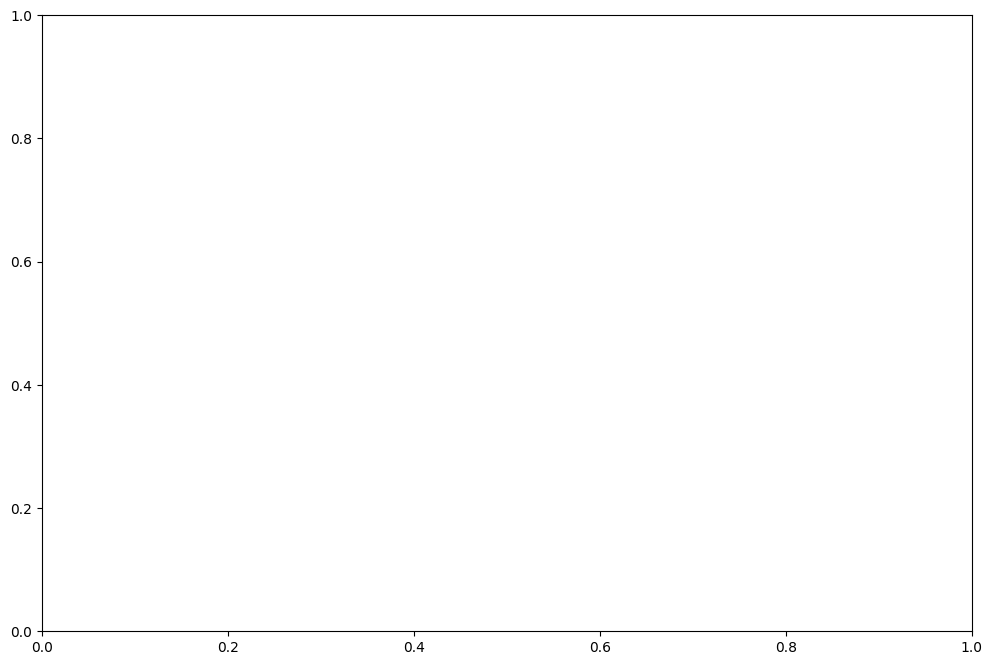

In [ ]:
!pip install geopandas matplotlib shapely

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# ... (Your existing code to load and filter Volkswagen data) ...

# Select features for clustering
features = volkswagen_df[['premium', 'buildyear_car', 'wa', 'wa_bep_ca', 'wa_ca', 'zipcode_link']] # Include zipcode_link

# Convert columns to numeric, handling errors and filling NaN with 0
for col in features.columns:
    if col != 'zipcode_link':  # Exclude zipcode_link from numeric conversion
        features[col] = pd.to_numeric(features[col], errors='coerce').fillna(0)

# Standardize the features (only if features is not empty)
if not features.empty:
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features[[col for col in features.columns if col != 'zipcode_link']]) # Exclude zipcode_link from scaling

    # Initialize KMeans and fit to the standardized features
    k = 5  # Define the number of clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(scaled_features)

    # Add cluster labels to the Volkswagen DataFrame
    volkswagen_df['cluster'] = pd.Series(clusters, index=features.index)

# --- Display Results ---

# 1. Cluster Characteristics (Average Premium per Cluster)
cluster_premium = volkswagen_df.groupby('cluster')['premium'].mean()
print("Average Premium per Cluster:\n", cluster_premium)

# 2. Geoplot of Clusters by Zip Code
# ... (Your existing code to load and merge with GeoJSON) ...

# 5. Plot the Clusters
fig, ax = plt.subplots(figsize=(12, 8))
# Make sure merged_gdf has a 'cluster' column
# If not, you may need to merge it based on 'zipcode_link' after clustering
merged_gdf.plot(column='cluster', cmap='tab10', legend=True, ax=ax)
plt.title("Geoplot of Clusters by Zip Code")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [ ]:
!pip install geopandas matplotlib shapely
!pip install adjustText  # Install adjustText if not already installed

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from adjustText import adjust_text  # Import adjustText for better text placement in the plot

# ... (Your existing code to load and filter Volkswagen data) ...

# Select features for clustering
features = volkswagen_df[['premium', 'buildyear_car', 'wa', 'wa_bep_ca', 'wa_ca', 'zipcode_link']]

# Convert columns to numeric, handling errors and filling NaN with 0
for col in features.columns:
    if col != 'zipcode_link':  # Exclude zipcode_link from numeric conversion
        features[col] = pd.to_numeric(features[col], errors='coerce').fillna(0)

# Standardize the features (only if features is not empty)
if not features.empty:
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features[[col for col in features.columns if col != 'zipcode_link']])

    # Initialize KMeans and fit to the standardized features
    k = 5  # Define the number of clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(scaled_features)

    # Add cluster labels to the Volkswagen DataFrame
    volkswagen_df['cluster'] = pd.Series(clusters, index=features.index)

    # --- Display Results ---

    # 1. Cluster Characteristics (Average Premium per Cluster)
    cluster_premium = volkswagen_df.groupby('cluster')['premium'].mean()
    print("Average Premium per Cluster for Volkswagen:\n", cluster_premium)

    # 2. Visualize Clusters (Scatter plot with cluster labels)
    plt.figure(figsize=(10, 6))

Average Premium per Cluster for Volkswagen:
 cluster
0     385.195259
1     389.442806
2     785.493509
3     948.249586
4    1695.267692
Name: premium, dtype: float64


<ipython-input-94-d9311897b45f>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[col] = pd.to_numeric(features[col], errors='coerce').fillna(0)
<ipython-input-94-d9311897b45f>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  volkswagen_df['cluster'] = pd.Series(clusters, index=features.index)


<Figure size 1000x600 with 0 Axes>

TypeError: can only concatenate str (not "int") to str

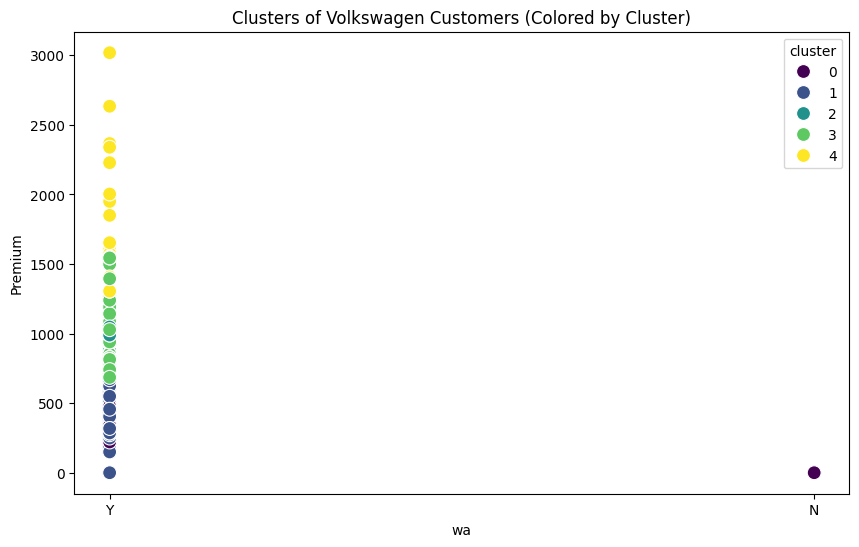

In [ ]:
!pip install geopandas matplotlib shapely
!pip install adjustText  # Install adjustText if not already installed
!pip install seaborn

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from adjustText import adjust_text  # Import adjustText for better text placement in the plot
import seaborn as sns  # Import Seaborn for plotting

# ... (Your existing code to load and filter Volkswagen data) ...

# Select features for clustering
# ... (Code to select features and handle missing values) ...

# Standardize the features
# ... (Code to standardize features) ...

# Initialize KMeans and fit to the standardized features
# ... (Code to initialize and fit KMeans) ...

# Add cluster labels to the Volkswagen DataFrame
# ... (Code to add cluster labels) ...

# --- Visualize Clusters ---
plt.figure(figsize=(10, 6))
sns.scatterplot(x='wa', y='premium', hue='cluster', data=volkswagen_df, palette='viridis', s=100)
plt.title('Clusters of Volkswagen Customers (Colored by Cluster)')
plt.xlabel('wa')
plt.ylabel('Premium')

# Add cluster labels as text annotations (adjust for better readability)
texts = []
for i in range(k):  # Iterate through clusters
    cluster_data = volkswagen_df[volkswagen_df['cluster'] == i]
    x_mean = cluster_data['wa'].mean()
    y_mean = cluster_data['premium'].mean()
    texts.append(plt.text(x_mean, y_mean, f'Cluster {i}', ha='center', va='center', fontsize=12))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='black'))  # Adjust text placement
plt.show()

TypeError: can only concatenate str (not "int") to str

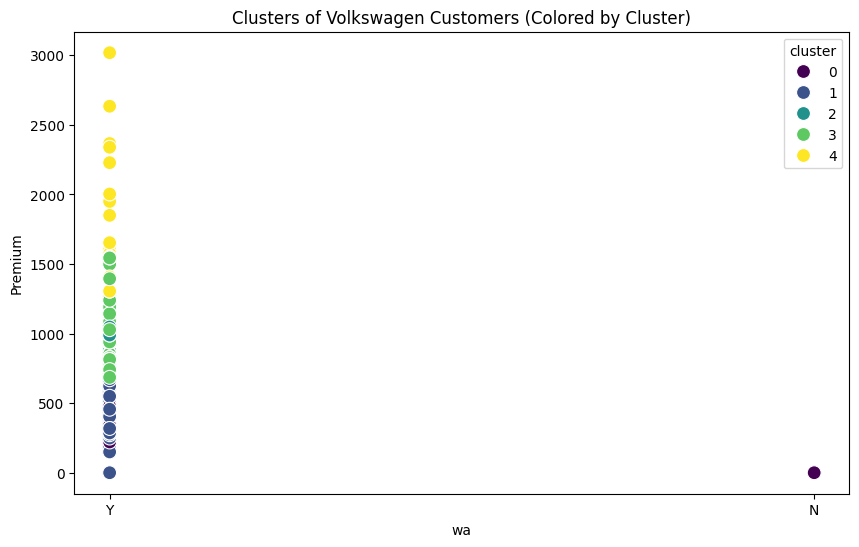

In [ ]:
!pip install geopandas matplotlib shapely
!pip install adjustText  # Install adjustText if not already installed
!pip install seaborn

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from adjustText import adjust_text  # Import adjustText for better text placement in the plot
import seaborn as sns  # Import Seaborn for plotting

# ... (Your existing code to load and filter Volkswagen data) ...

# Select features for clustering
# ... (Code to select features and handle missing values) ...

# Standardize the features
# ... (Code to standardize features) ...

# Initialize KMeans and fit to the standardized features
# ... (Code to initialize and fit KMeans) ...

# Add cluster labels to the Volkswagen DataFrame
# ... (Code to add cluster labels) ...

# --- Visualize Clusters ---
plt.figure(figsize=(10, 6))
sns.scatterplot(x='wa', y='premium', hue='cluster', data=volkswagen_df, palette='viridis', s=100)
plt.title('Clusters of Volkswagen Customers (Colored by Cluster)')
plt.xlabel('wa')
plt.ylabel('Premium')

# Add cluster labels as text annotations (adjust for better readability)
texts = []
for i in range(k):  # Iterate through clusters
    cluster_data = volkswagen_df[volkswagen_df['cluster'] == i]
    x_mean = cluster_data['wa'].mean()
    y_mean = cluster_data['premium'].mean()
    texts.append(plt.text(x_mean, y_mean, f'Cluster {i}', ha='center', va='center', fontsize=12))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='black'))  # Adjust text placement
plt.show()

In [ ]:
import pandas as pd
import geopandas as gpd

# Read the Excel file
excel_file_path = '/content/W31816-XLS-ENG (1).xlsx'
excel_data = pd.read_excel(excel_file_path)

# Read the GeoJSON file
geojson_file_path = '/content/us-zip-code-boundaries.geojson'
geo_data = gpd.read_file(geojson_file_path)

# Print some info to check if the data was loaded correctly
print("Excel Data:")
print(excel_data.head())  # Print the first few rows of the Excel data
print("\nGeoJSON Data:")
print(geo_data.head())  # Print the first few rows of the GeoJSON data

Excel Data:
        Unnamed: 0                                         Unnamed: 1
0              NaN                                                NaN
1  Product Number:                                             W31816
2           Title:  Allianz: Predicting Direct Debit with Machine ...
3              NaN  This spreadsheet supports the product "Allianz...
4     Prepared by:  Lennert Van der Schraelen, Emma Willems, Krist...

GeoJSON Data:
  STATEFP10 ZCTA5CE10  GEOID10 CLASSFP10 MTFCC10 FUNCSTAT10   ALAND10  \
0        06     94601  0694601        B5   G6350          S   8410939   
1        06     94501  0694501        B5   G6350          S  20539466   
2        06     94560  0694560        B5   G6350          S  35757865   
3        06     94587  0694587        B5   G6350          S  51075108   
4        06     94580  0694580        B5   G6350          S   8929836   

   AWATER10   INTPTLAT10    INTPTLON10 PARTFLG10  \
0    310703  +37.7755447  -122.2187049         N   
1   900530

In [ ]:
import pandas as pd

# 1. Load the data
df = pd.read_excel('/content/W27307-XLS-ENG.xlsx', sheet_name='funnel_data')

# 2. Identify and handle missing values (NaN)
# ---
# a. Check for NaN values in each column
print("NaN Counts:\n", df.isna().sum())

# b. Decide on a strategy for handling NaN values:
#    - Remove rows with NaN values (if appropriate)
#    - Fill NaN values with a specific value (e.g., 0, mean, median)
#    - Impute missing values using more advanced techniques

# Example: Remove rows with NaN values in specific columns
required_cols = ['status_report', 'brand', 'premium', 'policy_start_date']
df = df.dropna(subset=required_cols)

# 3. Identify and handle NaT (Not a Time) values
# ---
# a. Check for NaT values in date/time columns
date_cols = ['policy_start_date']  # List your date/time columns
for col in date_cols:
    nat_count = df[col].isnull().sum()
    print(f"\nNaT Count in '{col}':", nat_count)

# b. Decide on a strategy for handling NaT values:
#    - Remove rows with NaT values (if appropriate)
#    - Fill NaT values with a specific date/time
#    - Impute missing date/time values

# Example: Remove rows with NaT values in 'policy_start_date'
df = df[pd.notnull(df['policy_start_date'])]

# 4. Data Type Conversion
# ---
# a. Check data types of each column
print("\nData Types:\n", df.dtypes)

# b. Convert columns to the appropriate data types
# Example: Convert 'policy_start_date' to datetime
df['policy_start_date'] = pd.to_datetime(df['policy_start_date'], errors='coerce')

# Example: Convert numerical columns to numeric
numerical_cols = ['premium', 'buildyear_car', 'wa', 'wa_bep_ca', 'wa_ca']
for col in numerical_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 5. Handle Inconsistent Values (if any)
# ---
# a. Identify and correct any inconsistent values in your data
#    - For example, check for typos, incorrect capitalization, etc.

# Example: Correcting inconsistent brand names
df['brand'] = df['brand'].str.upper()  # Convert brand names to uppercase

# 6. Remove Duplicates (if any)
# ---
# a. Check for duplicate rows
print("\nDuplicate Rows:", df.duplicated().sum())

# b. Remove duplicate rows (if found)
df = df.drop_duplicates()

# 7. Final Data Inspection
# ---
# a. Check the cleaned DataFrame
print("\nCleaned DataFrame:\n", df.head())
print("\nData Types:\n", df.dtypes)
print("\nNaN Counts:\n", df.isna().sum())

# ... (Continue with your analysis using the cleaned DataFrame 'df') ...

NaN Counts:
 affinity_name           0
status_report           2
offer_number            0
policy_number        6801
zipcode_link            0
zip4                    0
birth_date            143
brand                   3
date_offer              0
date_request         6801
policy_start_date    6697
premium               379
buildyear_car           3
buildmonth_car          3
wa                   5792
wa_bep_ca            6312
wa_ca                5282
updated_on              0
dtype: int64

NaT Count in 'policy_start_date': 0

Data Types:
 affinity_name                object
status_report                object
offer_number                  int64
policy_number               float64
zipcode_link                  int64
zip4                          int64
birth_date           datetime64[ns]
brand                        object
date_offer           datetime64[ns]
date_request         datetime64[ns]
policy_start_date    datetime64[ns]
premium                     float64
buildyear_car          

In [ ]:
import pandas as pd

# 1. Load the data
df = pd.read_excel('/content/W31816-XLS-ENG (1).xlsx')

# 2. Identify and handle missing values (NaN)
# ---
# a. Check for NaN values in each column
print("NaN Counts:\n", df.isna().sum())

# b. Decide on a strategy for handling NaN values:
#    - Remove rows with NaN values (if appropriate)
#    - Fill NaN values with a specific value (e.g., 0, mean, median)
#    - Impute missing values using more advanced techniques

NaN Counts:
 Unnamed: 0    5
Unnamed: 1    6
dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load and Clean the Data (using the cleaning code from previous response)
df = pd.read_excel('/content/W31816-XLS-ENG (1).xlsx') # Load the correct file

# --- Insert your data cleaning code here if needed ---
# This ensures that 'df' contains the data from 'W31816-XLS-ENG (1).xlsx'
# ... (Insert data cleaning steps for W31816-XLS-ENG (1).xlsx) ...

# --- Check if 'population' column exists in the DataFrame
if 'population' not in df.columns:
    print("Error: 'population' column not found in the DataFrame.")
    # If 'population' is not a column, you might need to:
    # 1. Rename an existing column to 'population' if it contains the data.
    # 2. Load the correct data file if it was loaded incorrectly.
    # 3. Or add a 'population' column to the DataFrame if it's missing.
else:
    # 2. Market Behavior Analysis
    # ---

    # a. Population Distribution:
    plt.figure(figsize=(10, 6))
    sns.histplot(df['population'], bins=30, kde=True)
    plt.title('Population Distribution')
    plt.xlabel('Population')
    plt.ylabel('Frequency')
    plt.show()

    # b. Geographic Distribution:
    # ... (The rest of the code should work if 'df' has the correct data)

Error: 'population' column not found in the DataFrame.


In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly.express as px
from shapely.geometry import Point
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# 1. Load and preprocess data
df = pd.read_excel('/content/W27307-XLS-ENG.xlsx', sheet_name='funnel_data')
volkswagen_df = df[df['brand'] == 'VOLKSWAGEN']

# 2. Select relevant features and handle missing values
features = volkswagen_df[['zipcode_link', 'premium', 'buildyear_car', 'wa', 'wa_bep_ca', 'wa_ca']]
features = features.dropna()  # Drop rows with missing values

# 3. Convert zipcode_link to numeric, handling errors
features['zipcode_link'] = pd.to_numeric(features['zipcode_link'], errors='coerce')
features = features.dropna(subset=['zipcode_link'])  # Drop rows with invalid zipcodes

# 4. Standardize the features for clustering
# --- Changed code starts here ---
# Convert columns to numeric, replacing 'N' with NaN, then filling NaN with 0
for col in ['premium', 'buildyear_car', 'wa', 'wa_bep_ca', 'wa_ca']:
    features[col] = pd.to_numeric(features[col], errors='coerce').fillna(0)

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features[['premium', 'buildyear_car', 'wa', 'wa_bep_ca', 'wa_ca']])
# --- Changed code ends here ---

# 5. Perform KMeans clustering
k = 3  # Number of clusters (adjust as needed)
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# 6. Add cluster labels to the Volkswagen DataFrame
features['cluster'] = clusters

# 7. Load US zip code shapefile (download if needed)
# !wget -O us-zip-code-boundaries.geojson "https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json"
# zipcodes =

<ipython-input-50-92aaf3b33a02>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Competitor', y='Market Share', data=df, palette=colors)


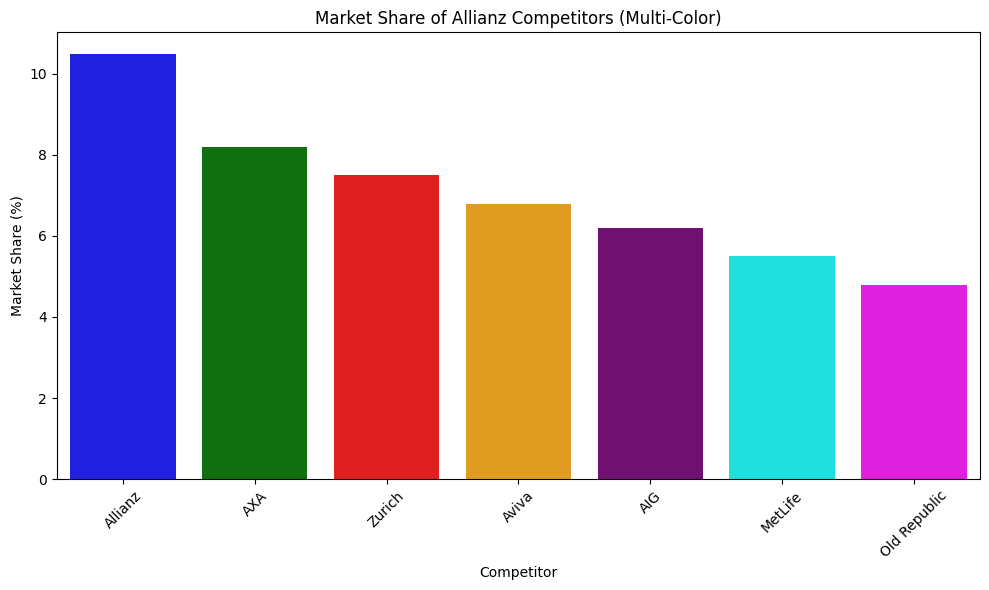

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Competitor data (replace with actual data if needed)
competitor_data = {
    'Competitor': ['Allianz', 'AXA', 'Zurich', 'Aviva', 'AIG', 'MetLife', 'Old Republic'],
    'Market Share': [10.5, 8.2, 7.5, 6.8, 6.2, 5.5, 4.8],  # Example metric
    'Revenue': [120, 95, 88, 80, 75, 65, 55],  # Example metric
}

# Create Pandas DataFrame
df = pd.DataFrame(competitor_data)

# Define colors for each competitor
colors = ['blue', 'green', 'red', 'orange', 'purple', 'cyan', 'magenta']

# Create bar chart with multi-color
plt.figure(figsize=(10, 6))
sns.barplot(x='Competitor', y='Market Share', data=df, palette=colors)
plt.title('Market Share of Allianz Competitors (Multi-Color)')
plt.xlabel('Competitor')
plt.ylabel('Market Share (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Run A regressional Model for Revenue and losses  

Clean the data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Load Data:
# -------------

# Load regional data
df_regional = pd.read_excel('/content/W27309-XLS-ENG.xlsx')

# Load funnel data (assuming this is related to revenue/sales)
df_funnel = pd.read_excel('/content/W27307-XLS-ENG.xlsx')

# Load claims data (assuming this contains information on costs)
df_claims = pd.read_excel('/content/W31816-XLS-ENG (1).xlsx')  # Replace with your actual path if different


# 2. Data Cleaning and Preparation:
#